In [4]:
## Pacotes utilizados 

## Bibliotecas de importação 
import os 
import tarfile 
import urllib 
import pandas as pd 
import matplotlib as plt 

## Outras bibliotecas para analise de dados e aprendizado de máquina

import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'
import prince
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from scipy.stats import norm

from scipy.stats import norm
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importação banco e exploração dos dados: Var cat e numéricas para a análise dos dados 
### Preparação do algoritimo p/ sistema de análise
'''
Sequências de algoritimos: Base Line (Percentual de acerto mínimo do modelo, Algoritmos de inferência para análise de desempenho, 
determinação dos coeficientes significativos em análise, chances de candidato ter êxito para o problema de classificação proposto. Divisão por nível, avaliado para aplicação do modelo Hierárquico.)
'''

In [5]:
## Importação dos datasets: Lista das regiões que foram integradas ao banco para discussão de diferenças de desempenho 
## entre os alunos da capital metropolitana e das mesorregiões 

import pandas as pd
import os

def load_dados_enem_micro(dados_path, file_name):
    """
    Função para carregar um arquivo CSV a partir de um diretório específico.
    
    Parameters:
    dados_path (str): O caminho para o diretório onde os arquivos CSV estão localizados.
    file_name (str): O nome do arquivo CSV a ser carregado.
    
    Returns:
    pd.DataFrame: DataFrame contendo os dados do arquivo CSV.
    """
    # Constrói o caminho completo para o arquivo CSV
    csv_path = os.path.join(dados_path, file_name)
    
    # C
    #Carrega o arquivo CSV em um DataFrame
    return pd.read_csv(csv_path)

# Exemplo de uso:
dados_path = "C:/Users/DELL/OneDrive/Documentos/Modelagem_Multinível/MODELAGEM MULTINIVEL I revisado/MODELAGEM MULTINIVEL I revisado"  # Substitua pelo caminho real
file_name = "Banco_dados_RJ_Mesoregioes_capital_DEP_ADM.csv"

# Detalhes da Amostra

## Regiões  
'''
## Categorias das Mesoregiões 
mesoregioes = {
    'Norte_Fluminense': ['Campos_dos_Goytacazes', 'Sao_Fidelis', 'Sao_Francisco_de_Itabapoana', 'Macae', 'Quissama'],
    'Noroeste_Fluminense': ['Bom_Jesus_do_Itabopoana', 'Itaperuna', 'Itaocara', 'Miracema', 'Santo_Antonio_de_Padua'],
    'Centro_Fluminense': ['Nova_Friburgo', 'Casimiro_de_Abreu', 'Rio_das_Ostras', 'Araruama', 'Cabo_Frio', 'Iguaba_Grande', 'Sao_Pedro_da_Aldeia', 'Saquarema'],
    'Sul_Fluminense': ['Barra_Mansa', 'Itatiaia', 'Resende', 'Rio_claro', 'Volta_Redonda', 'Barra_do_Pirai', 'Valenca', 'Paraty']    
}
'''

## Capital Metropolitana: Rio de Janeiro


# Carrega os dados do arquivo CSV
df_01 = load_dados_enem_micro(dados_path, file_name)

# Exibindo as primeiras linhas do DataFrame para verificar o conteúdo
print(df_01.head())

   Unnamed: 0.1  Unnamed: 0 NO_MUNICIPIO_PROVA  NU_INSCRICAO  NU_NOTA_MT  \
0             0     2757912          Itaperuna  210061103942       484.9   
1             1     2758082          Itaperuna  210058085137       872.2   
2             2     2758158          Itaperuna  210061094616       364.1   
3             3     2758360          Itaperuna  210060036801       506.7   
4             4     2758461          Itaperuna  210061410596       613.4   

   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO    Q001  ...  \
0       466.8       490.6       526.8            600.0  E_Q001  ...   
1       770.9       638.7       634.1            920.0  E_Q001  ...   
2       434.5       368.0       437.1            520.0  D_Q001  ...   
3       507.1       631.8       580.8            720.0  D_Q001  ...   
4       475.8       563.3       535.6            680.0  D_Q001  ...   

         Q025  Regioes TP_ANO_CONCLUIU  TP_FAIXA_ETARIA    TP_SEXO  \
0  B_Q025_Sim  Sudeste               1        

In [6]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        83624 non-null  int64  
 1   Unnamed: 0          83624 non-null  int64  
 2   NO_MUNICIPIO_PROVA  83624 non-null  object 
 3   NU_INSCRICAO        83624 non-null  int64  
 4   NU_NOTA_MT          83624 non-null  float64
 5   NU_NOTA_CN          83624 non-null  float64
 6   NU_NOTA_CH          83624 non-null  float64
 7   NU_NOTA_LC          83624 non-null  float64
 8   NU_NOTA_REDACAO     83624 non-null  float64
 9   Q001                83624 non-null  object 
 10  Q002                83624 non-null  object 
 11  Q003                83624 non-null  object 
 12  Q004                83624 non-null  object 
 13  Q005                83624 non-null  int64  
 14  Q006                83624 non-null  object 
 15  Q007                83624 non-null  object 
 16  Q008

In [7]:
df_01['Meso_Regiao'].value_counts()
Educacao_enem_bin_mt_muni_02 = df_01

In [8]:
## Divisão final entre as regiões: testes aferidos em Spyder, para identificação de agrupamentos de variáveis - K-means ou 
## outros aspectos que levassem a progressão no estudo - Análise Factorial com dados mistos, quantitativos e qualitativos categóricos 
## do questionário social - nome dos datasets vinculado a testes do banco de dados eferido antes da formatação final do objeto 

Educacao_enem_bin_mt_muni_02_RJ = Educacao_enem_bin_mt_muni_02[Educacao_enem_bin_mt_muni_02['Meso_Regiao'] == 'Capital_Metropolitana']
Educacao_enem_bin_mt_muni_02_Meso = Educacao_enem_bin_mt_muni_02[Educacao_enem_bin_mt_muni_02['Meso_Regiao'] != 'Capital_Metropolitana']
df_01.isna()
total_missing = df_01.isnull().sum().sum()
print(total_missing) ## RETIRADA DOS VALORES FALTANTES, ALUNOS FALTANTES E DOS QUE TIRARAM ZERO NA PROVA DO EXAME NACIONAL 

0


In [9]:
## Capital: 
Educacao_enem_bin_mt_muni_02_RJ

Unnamed: 0.1  Unnamed: 0 NO_MUNICIPIO_PROVA  NU_INSCRICAO  NU_NOTA_MT  \
1327           1327     2757913     Rio_de_Janeiro  210059980945       424.6   
1328           1328     2757918     Rio_de_Janeiro  210060373826       494.2   
1329           1329     2757924     Rio_de_Janeiro  210059980951       694.4   
1330           1330     2757932     Rio_de_Janeiro  210059974463       365.3   
1331           1331     2757940     Rio_de_Janeiro  210058387341       751.5   
...             ...         ...                ...           ...         ...   
58631         58631     3040142     Rio_de_Janeiro  210061046955       729.3   
58632         58632     3040169     Rio_de_Janeiro  210060249290       696.2   
58633         58633     3040178     Rio_de_Janeiro  210059279317       605.7   
58634         58634     3040195     Rio_de_Janeiro  210061481017       640.3   
58635         58635     3040200     Rio_de_Janeiro  210060251787       701.9   

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO    Q001  ...  \
1327        505.0       497.1       543.1            500.0  H_Q001  ...   
1328        503.1       502.1       569.5            600.0  H_Q001  ...   
1329        588.4       618.8       614.9            540.0  F_Q001  ...   
1330        448.1       508.8       484.3            680.0  B_Q001  ...   
1331        571.7       611.9       607.7            700.0  G_Q001  ...   
...           ...         ...         ...              ...     ...  ...   
58631       537.8       712.2       639.3            940.0  G_Q001  ...   
58632       493.9       502.1       560.8            580.0  B_Q001  ...   
58633       585.6       560.2       633.7            560.0  F_Q001  ...   
58634       398.0       566.2       573.0            700.0  E_Q001  ...   
58635       527.8       515.2       529.1            640.0  F_Q001  ...   

             Q025  Regioes TP_ANO_CONCLUIU  TP_FAIXA_ETARIA    TP_SEXO  \
1327   B_Q025_Sim  Sudeste               2                4   Feminino   
1328   B_Q025_Sim  Sudeste               2                4   Feminino   
1329   B_Q025_Sim  Sudeste               1                4  Masculino   
1330   B_Q025_Sim  Sudeste               0                3   Feminino   
1331   B_Q025_Sim  Sudeste               1                3  Masculino   
...           ...      ...             ...              ...        ...   
58631  B_Q025_Sim  Sudeste               2                4  Masculino   
58632  B_Q025_Sim  Sudeste               0                2  Masculino   
58633  B_Q025_Sim  Sudeste               1                6   Feminino   
58634  B_Q025_Sim  Sudeste               0                3   Feminino   
58635  B_Q025_Sim  Sudeste               0                7   Feminino   

      TP_COR_RACA     TP_ESCOLA     TP_ST_CONCLUSAO   Media  \
1327        Parda  Naorespondeu  Concluiensinomedio  493.96   
1328       Branca  Naorespondeu  Concluiensinomedio  533.78   
1329       Branca  Naorespondeu  Concluiensinomedio  611.30   
1330        Parda       Publica   Estoucursando2023  497.30   
1331       Branca  Naorespondeu  Concluiensinomedio  648.56   
...           ...           ...                 ...     ...   
58631      Branca  Naorespondeu  Concluiensinomedio  711.72   
58632      Branca  Naorespondeu            Apos2023  566.60   
58633      Branca  Naorespondeu  Concluiensinomedio  589.04   
58634      Branca       Privada   Estoucursando2023  575.50   
58635      Branca  Naorespondeu  Concluiensinomedio  582.80   

                 Meso_Regiao  
1327   Capital_Metropolitana  
1328   Capital_Metropolitana  
1329   Capital_Metropolitana  
1330   Capital_Metropolitana  
1331   Capital_Metropolitana  
...                      ...  
58631  Capital_Metropolitana  
58632  Capital_Metropolitana  
58633  Capital_Metropolitana  
58634  Capital_Metropolitana  
58635  Capital_Metropolitana  

[57309 rows x 42 columns]

In [10]:
## Mesorregiões
Educacao_enem_bin_mt_muni_02_Meso

Unnamed: 0.1  Unnamed: 0 NO_MUNICIPIO_PROVA  NU_INSCRICAO  NU_NOTA_MT  \
0                 0     2757912          Itaperuna  210061103942       484.9   
1                 1     2758082          Itaperuna  210058085137       872.2   
2                 2     2758158          Itaperuna  210061094616       364.1   
3                 3     2758360          Itaperuna  210060036801       506.7   
4                 4     2758461          Itaperuna  210061410596       613.4   
...             ...         ...                ...           ...         ...   
83619         83619     3035807          Saquarema  210061827083       634.5   
83620         83620     3037000          Saquarema  210059974072       525.2   
83621         83621     3037421          Saquarema  210059583021       549.4   
83622         83622     3037523          Saquarema  210060999313       548.6   
83623         83623     3039189          Saquarema  210061149123       839.1   

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO    Q001  ...  \
0           466.8       490.6       526.8            600.0  E_Q001  ...   
1           770.9       638.7       634.1            920.0  E_Q001  ...   
2           434.5       368.0       437.1            520.0  D_Q001  ...   
3           507.1       631.8       580.8            720.0  D_Q001  ...   
4           475.8       563.3       535.6            680.0  D_Q001  ...   
...           ...         ...         ...              ...     ...  ...   
83619       512.1       514.4       463.3            500.0  E_Q001  ...   
83620       461.6       517.9       507.7            620.0  E_Q001  ...   
83621       520.9       432.9       517.4            580.0  H_Q001  ...   
83622       483.0       547.0       470.6            380.0  E_Q001  ...   
83623       609.1       530.8       465.0            540.0  E_Q001  ...   

             Q025  Regioes TP_ANO_CONCLUIU  TP_FAIXA_ETARIA    TP_SEXO  \
0      B_Q025_Sim  Sudeste               1                3  Masculino   
1      B_Q025_Sim  Sudeste               1                5  Masculino   
2      B_Q025_Sim  Sudeste               0                3  Masculino   
3      B_Q025_Sim  Sudeste               0                2   Feminino   
4      B_Q025_Sim  Sudeste               0                3   Feminino   
...           ...      ...             ...              ...        ...   
83619  B_Q025_Sim  Sudeste               0                4  Masculino   
83620  B_Q025_Sim  Sudeste               0                2   Feminino   
83621  B_Q025_Sim  Sudeste               0                3  Masculino   
83622  B_Q025_Sim  Sudeste               0                2   Feminino   
83623  B_Q025_Sim  Sudeste               0                2  Masculino   

      TP_COR_RACA     TP_ESCOLA     TP_ST_CONCLUSAO   Media  \
0          Branca  Naorespondeu  Concluiensinomedio  513.82   
1          Branca  Naorespondeu  Concluiensinomedio  767.18   
2           Parda       Publica   Estoucursando2023  424.74   
3           Parda       Publica   Estoucursando2023  589.28   
4          Branca       Publica   Estoucursando2023  573.62   
...           ...           ...                 ...     ...   
83619       Parda       Publica   Estoucursando2023  524.86   
83620      Branca       Publica   Estoucursando2023  526.48   
83621      Branca       Publica   Estoucursando2023  520.12   
83622       Preta       Publica   Estoucursando2023  485.84   
83623      Branca       Privada   Estoucursando2023  596.80   

               Meso_Regiao  
0      Noroeste_Fluminense  
1      Noroeste_Fluminense  
2      Noroeste_Fluminense  
3      Noroeste_Fluminense  
4      Noroeste_Fluminense  
...                    ...  
83619    Centro_Fluminense  
83620    Centro_Fluminense  
83621    Centro_Fluminense  
83622    Centro_Fluminense  
83623    Centro_Fluminense  

[26315 rows x 42 columns]

In [11]:
## Contagem das variáveis de exploração, vinculadas a testes estatísticos e que fizeram parte dos preditores finais 
import pandas as pd

# Supondo que 'Educacao_enem_bin_mt_muni_02_RJ' já esteja carregado como um DataFrame
def contar_categorias(df, colunas):
    for coluna in colunas:
        print(f"Contagem para a variável {coluna}:")
        print(df[coluna].value_counts())
        print("\n")  # Linha em branco para separar os resultados

# Lista das variáveis que você quer contar
variaveis = [
    'Q025', 'Q024', 'Q023', 'Q022', 'Q021', 'Q019', 'Q018', 'Q017', 'Q016', 'Q015', 'Q014',
    'Q013', 'Q012', 'Q010', 'Q009', 'Q008', 'Q007', 'Q006', 'Q005', 'Q004', 'Q003', 
    'Q002', 'Q001'
]

# Chamando a função para contar as categorias
contar_categorias(Educacao_enem_bin_mt_muni_02_RJ, variaveis)

Contagem para a variável Q025:
Q025
B_Q025_Sim    54727
A_Q025_Nao     2582
Name: count, dtype: int64


Contagem para a variável Q024:
Q024
B_Q024_Um                23683
A_Q024_nenhum            17943
C_Q024_Dois               8870
D_Q024_Tres               4265
E_Q024_Quatro_ou_mais     2548
Name: count, dtype: int64


Contagem para a variável Q023:
Q023
A_Nao_Q023    45437
B_Sim_Q023    11872
Name: count, dtype: int64


Contagem para a variável Q022:
Q022
D_Tres_Q022           19656
E_Quatro_mais_Q022    16694
C_Dois_Q022           13129
B_Um_Q022              6321
A_Nao_Q022             1509
Name: count, dtype: int64


Contagem para a variável Q021:
Q021
A_Nao_Q021    32624
B_Sim_Q021    24685
Name: count, dtype: int64


Contagem para a variável Q019:
Q019
B_Um_Q019             27060
C_Dois_Q019           15578
D_Tres_Q019            8689
E_Quatro_mais_Q019     4498
A_Nao_Q019             1484
Name: count, dtype: int64


Contagem para a variável Q018:
Q018
A_Nao_Q018    34852
B_Sim

In [13]:
## Contagem das variáveis de exploração, vinculadas a testes estatísticos e que fizeram parte dos preditores finais 
import pandas as pd
## Código com auxílio GPT
# Supondo que 'Educacao_enem_bin_mt_muni_02_RJ' já esteja carregado como um DataFrame
def contar_categorias(df, colunas):
    for coluna in colunas:
        print(f"Contagem para a variável {coluna}:")
        print(df[coluna].value_counts())
        print("\n")  # Linha em branco para separar os resultados

# Lista das variáveis que você quer contar
variaveis = [
    'Q025', 'Q024', 'Q023', 'Q022', 'Q021', 'Q019', 'Q018', 'Q017', 'Q016', 'Q015', 'Q014',
    'Q013', 'Q012', 'Q010', 'Q009', 'Q008', 'Q007', 'Q006', 'Q005', 'Q004', 'Q003', 
    'Q002', 'Q001'
]

# Chamando a função para contar as categorias
contar_categorias(Educacao_enem_bin_mt_muni_02_Meso, variaveis)

Contagem para a variável Q025:
Q025
B_Q025_Sim    25433
A_Q025_Nao      882
Name: count, dtype: int64


Contagem para a variável Q024:
Q024
B_Q024_Um                11390
A_Q024_nenhum            10054
C_Q024_Dois               3260
D_Q024_Tres               1160
E_Q024_Quatro_ou_mais      451
Name: count, dtype: int64


Contagem para a variável Q023:
Q023
A_Nao_Q023    23064
B_Sim_Q023     3251
Name: count, dtype: int64


Contagem para a variável Q022:
Q022
D_Tres_Q022           9502
E_Quatro_mais_Q022    7552
C_Dois_Q022           5916
B_Um_Q022             2710
A_Nao_Q022             635
Name: count, dtype: int64


Contagem para a variável Q021:
Q021
A_Nao_Q021    18400
B_Sim_Q021     7915
Name: count, dtype: int64


Contagem para a variável Q019:
Q019
B_Um_Q019             14525
C_Dois_Q019            6564
D_Tres_Q019            2894
E_Quatro_mais_Q019     1347
A_Nao_Q019              985
Name: count, dtype: int64


Contagem para a variável Q018:
Q018
A_Nao_Q018    17805
B_Sim_Q018

In [14]:
## Contagem das variáveis de exploração, vinculadas a testes estatísticos e que fizeram parte dos preditores finais 
import pandas as pd

# Supondo que 'Educacao_enem_bin_mt_muni_02_RJ' já esteja carregado como um DataFrame
def contar_categorias(df, colunas):
    for coluna in colunas:
        print(f"Contagem para a variável {coluna}:")
        print(df[coluna].value_counts())
        print("\n")  # Linha em branco para separar os resultados

# Lista das variáveis que você quer contar
variaveis = [
    'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_ST_CONCLUSAO' 
]

# Chamando a função para contar as categorias
contar_categorias(Educacao_enem_bin_mt_muni_02_Meso, variaveis)

Contagem para a variável TP_SEXO:
TP_SEXO
Feminino     16345
Masculino     9970
Name: count, dtype: int64


Contagem para a variável TP_COR_RACA:
TP_COR_RACA
Branca          14131
Parda            7692
Preta            3928
Naodeclarado      276
Amarela           235
Indigena           53
Name: count, dtype: int64


Contagem para a variável TP_ESCOLA:
TP_ESCOLA
Naorespondeu    12320
Publica          9949
Privada          4046
Name: count, dtype: int64


Contagem para a variável TP_ST_CONCLUSAO:
TP_ST_CONCLUSAO
Estoucursando2023              13995
Concluiensinomedio              9046
Apos2023                        3253
Naoconcluienaoestoucursando       21
Name: count, dtype: int64




## CATEGORIA POR REGIÃO: CAPITAL DO RIO DE JANEIRO E MESORREGIÕES -> Exploração dos dados 
#### Gráficos Box-Plots var categoricas Pela ordem - Capital Metropolitana - Datset de análise: Municipios sem padronização - Var preditoras

## MATEMÁTICA

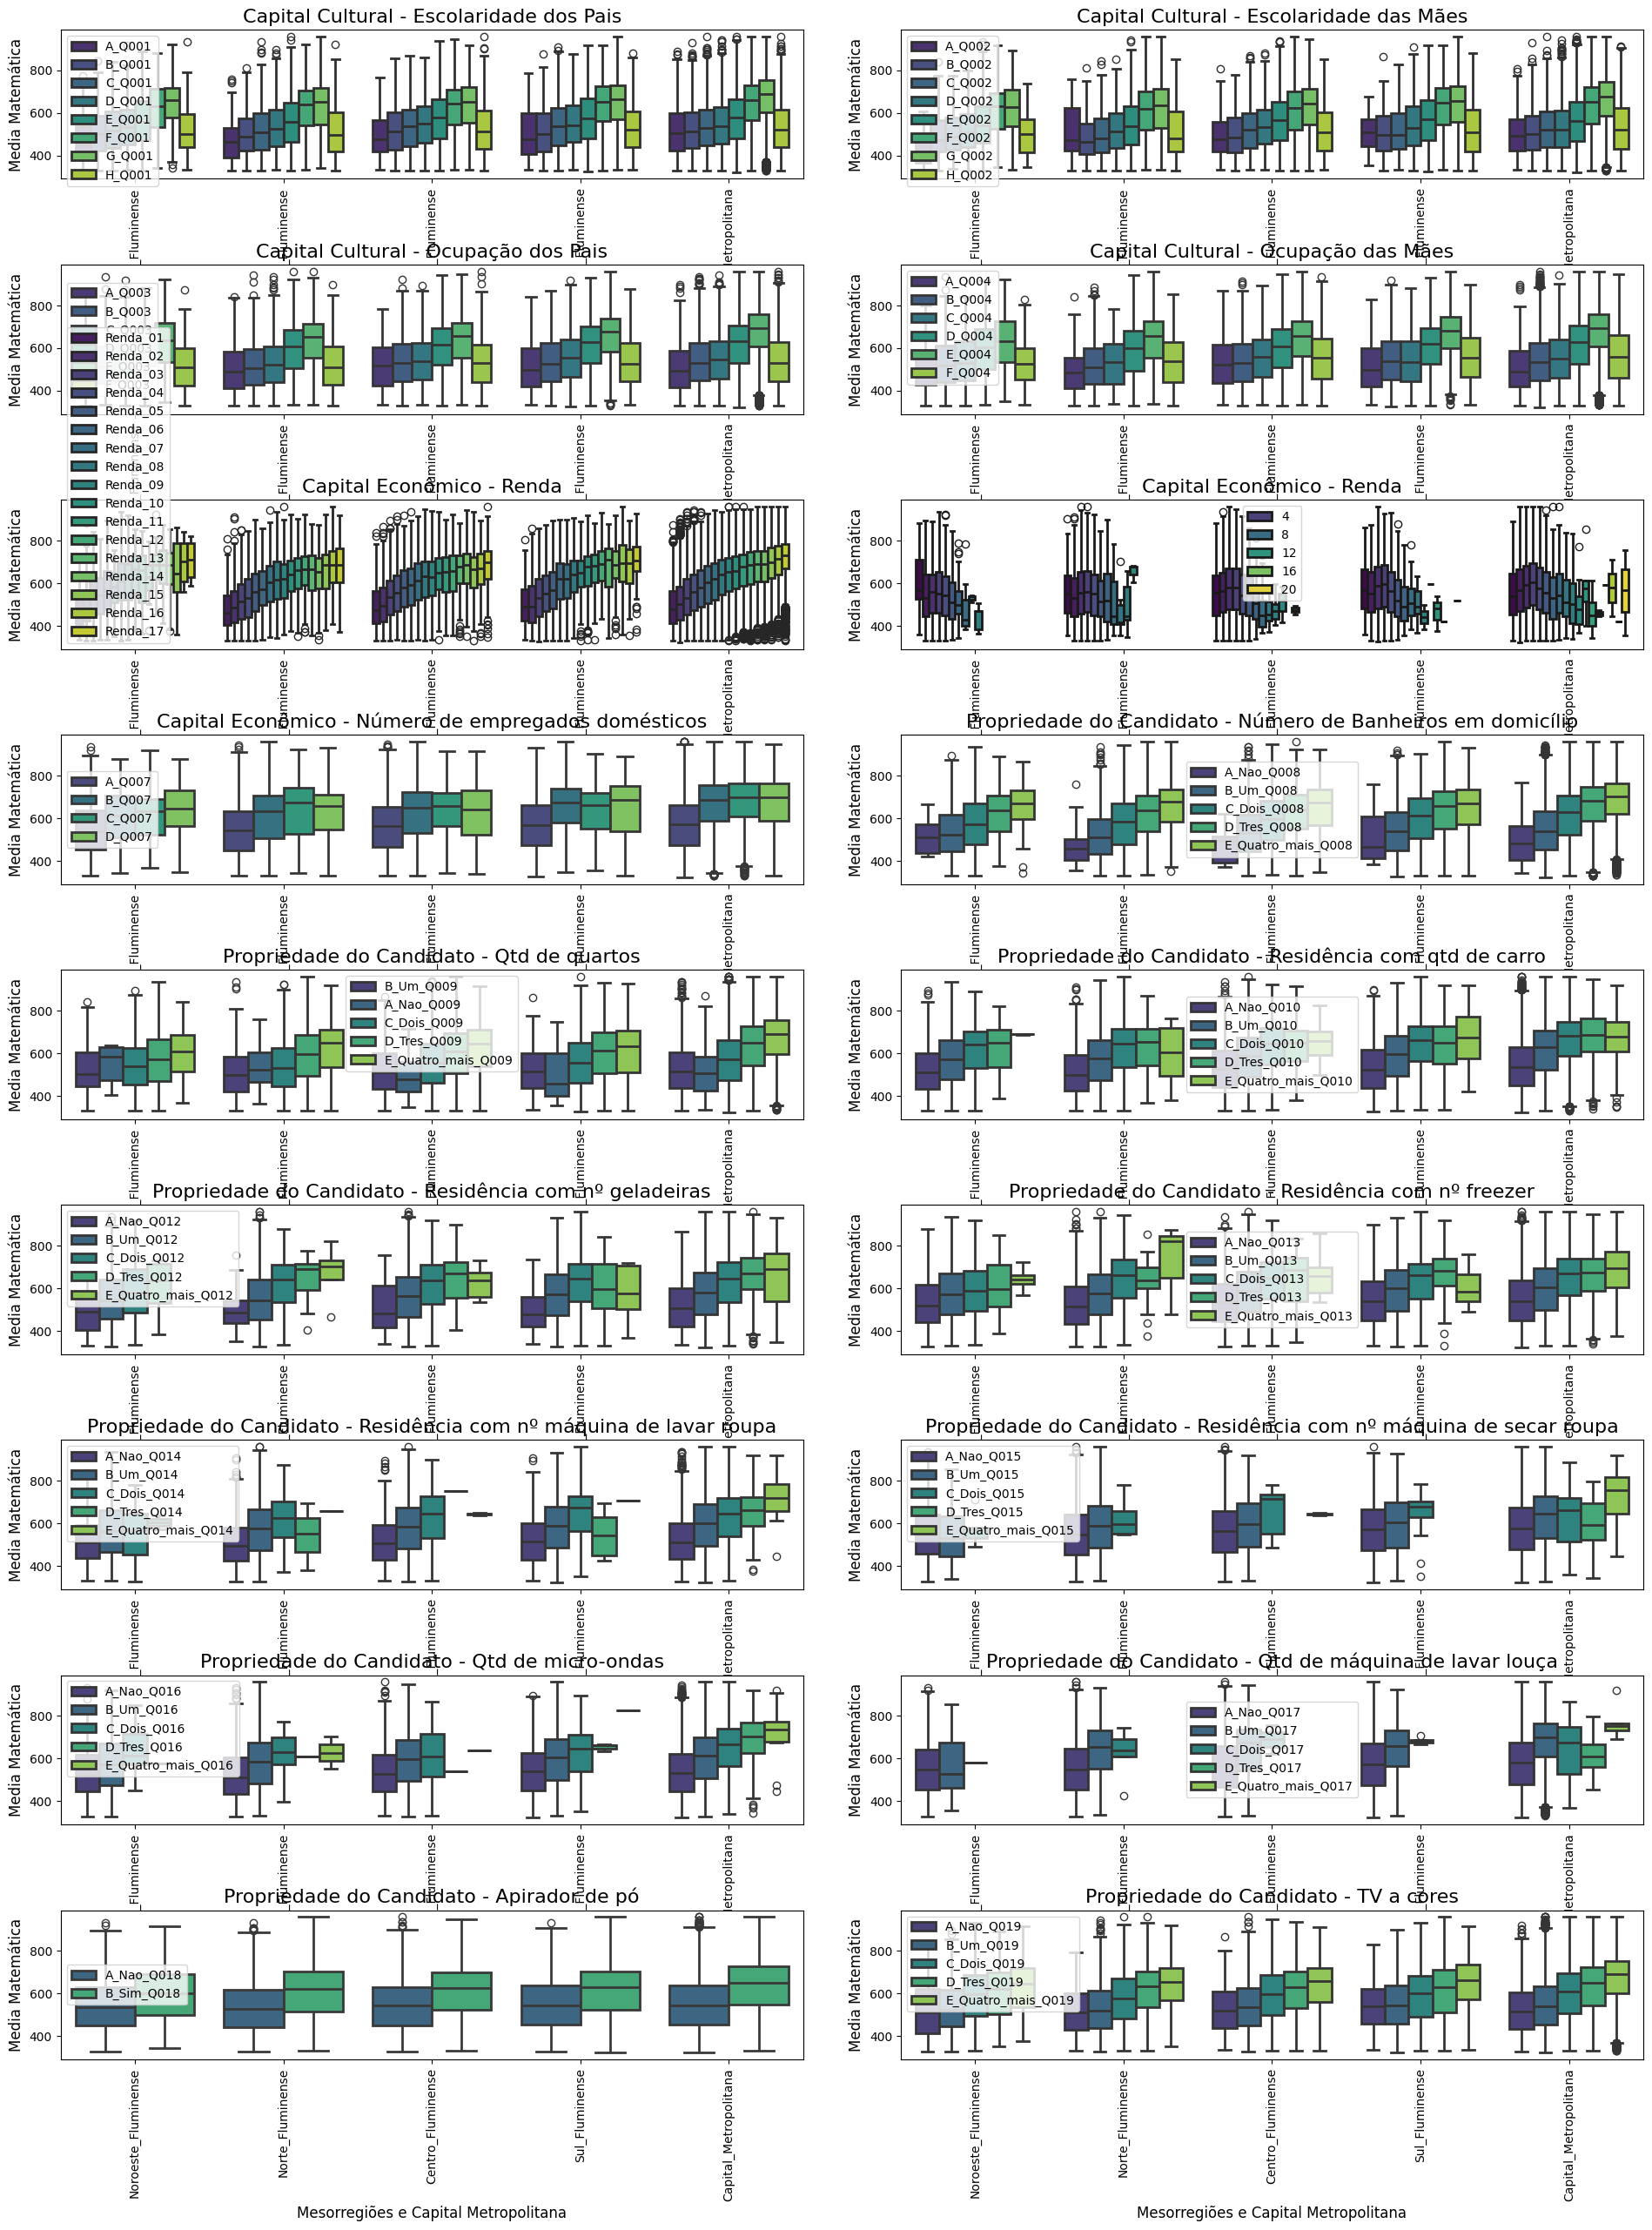

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_MT', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Mesorregiões e Capital Metropolitana', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(9, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_MT'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 1: Escolaridade dos Pais (Q001)
sorted_df_1 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q001'])
plot_boxplot(axs[0, 0], sorted_df_1, ordem_categorias, 'Q001', 'Capital Cultural - Escolaridade dos Pais')

# Gráfico 2: Escolaridade das Mães (Q002)
sorted_df_2 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q002'])
plot_boxplot(axs[0, 1], sorted_df_2, ordem_categorias, 'Q002', 'Capital Cultural - Escolaridade das Mães')

# Gráfico 3: Ocupação dos Pais (Q003)
sorted_df_3 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q003'])
plot_boxplot(axs[1, 0], sorted_df_3, ordem_categorias, 'Q003', 'Capital Cultural - Ocupação dos Pais')

# Gráfico 4: Ocupação das Mães (Q004)
sorted_df_4 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q004'])
plot_boxplot(axs[1, 1], sorted_df_4, ordem_categorias, 'Q004', 'Capital Cultural - Ocupação das Mães')

# Gráfico 5: Renda (Q006)
sorted_df_5 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q006'])
plot_boxplot(axs[2, 0], sorted_df_5, ordem_categorias, 'Q006', 'Capital Econômico - Renda')

# Gráfico 6: Número de pessoas por residência (Q005)
sorted_df_6 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q005'])
plot_boxplot(axs[2, 1], sorted_df_6, ordem_categorias, 'Q005', 'Capital Econômico - Renda')


# Gráfico 7: Número de empregados domésticos (Q007)
sorted_df_7 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q007'])
plot_boxplot(axs[3, 0], sorted_df_7, ordem_categorias, 'Q007', 'Capital Econômico - Número de empregados domésticos')

# Gráfico 8: Qtd de banheiros (Q008)
sorted_df_8 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q008'])
plot_boxplot(axs[3, 1], sorted_df_8, ordem_categorias, 'Q008', 'Propriedade do Candidato - Número de Banheiros em domicílio')

# Gráfico 9: Qtd de quartos (Q009)
sorted_df_9 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q009'])
plot_boxplot(axs[4, 0], sorted_df_8, ordem_categorias, 'Q009', 'Propriedade do Candidato - Qtd de quartos')

# Gráfico 10: Qtd de carros (Q010)
sorted_df_10 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q010'])
plot_boxplot(axs[4, 1], sorted_df_10, ordem_categorias, 'Q010', 'Propriedade do Candidato - Residência com qtd de carro')

# Gráfico 12: Qtd de geladeiras (Q011)
sorted_df_12 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q012'])
plot_boxplot(axs[5, 0], sorted_df_12, ordem_categorias, 'Q012', 'Propriedade do Candidato - Residência com nº geladeiras')

# Gráfico 13: Qtd de Freezers (Q013)
sorted_df_13 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q013'])
plot_boxplot(axs[5, 1], sorted_df_13, ordem_categorias, 'Q013', 'Propriedade do Candidato - Residência com nº freezer')

# Gráfico 14: Qtd de Lavar Roupa (Q014)
sorted_df_14 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q014'])
plot_boxplot(axs[6, 0], sorted_df_14, ordem_categorias, 'Q014', 'Propriedade do Candidato - Residência com nº máquina de lavar roupa')

# Gráfico 15: Qtd de Secar Roupa (Q015)
sorted_df_15 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q015'])
plot_boxplot(axs[6, 1], sorted_df_15, ordem_categorias, 'Q015', 'Propriedade do Candidato - Residência com nº máquina de secar roupa')

# Gráfico 16: Qtd de Microondas (Q016)
sorted_df_16 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q016'])
plot_boxplot(axs[7, 0], sorted_df_16, ordem_categorias, 'Q016', 'Propriedade do Candidato - Qtd de micro-ondas')

# Gráfico 17: Qtd de Lavar Louça (Q017)
sorted_df_17 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q017'])
plot_boxplot(axs[7, 1], sorted_df_17, ordem_categorias, 'Q017', 'Propriedade do Candidato - Qtd de máquina de lavar louça')

# Gráfico 18: Qtd Aspirador de Pó (Q018)
sorted_df_18 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q018'])
plot_boxplot(axs[8, 0], sorted_df_18, ordem_categorias, 'Q018', 'Propriedade do Candidato - Apirador de pó')

# Gráfico 19: Qtd de TV a cores (Q019)
sorted_df_19 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q019'])
plot_boxplot(axs[8, 1], sorted_df_19, ordem_categorias, 'Q019', 'Propriedade do Candidato - TV a cores')

'''
# Gráfico 8: Número de TVs a cores (Q019)
sorted_df_8 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q019'])
plot_boxplot(axs[3, 1], sorted_df_8, ordem_categorias, 'Q019', 'Capital Econômico - Número de TVs a cores')

# Gráfico 9: TV por assinatura (Q021)
sorted_df_9 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q021'])
plot_boxplot(axs[4, 0], sorted_df_9, ordem_categorias, 'Q021', 'Capital Econômico - TV por assinatura')

# Gráfico 10: Telefone celular (Q022)
sorted_df_10 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q022'])
plot_boxplot(axs[4, 1], sorted_df_10, ordem_categorias, 'Q022', 'Capital Econômico - Telefone celular')
'''
# Exibir o gráfico
plt.show()

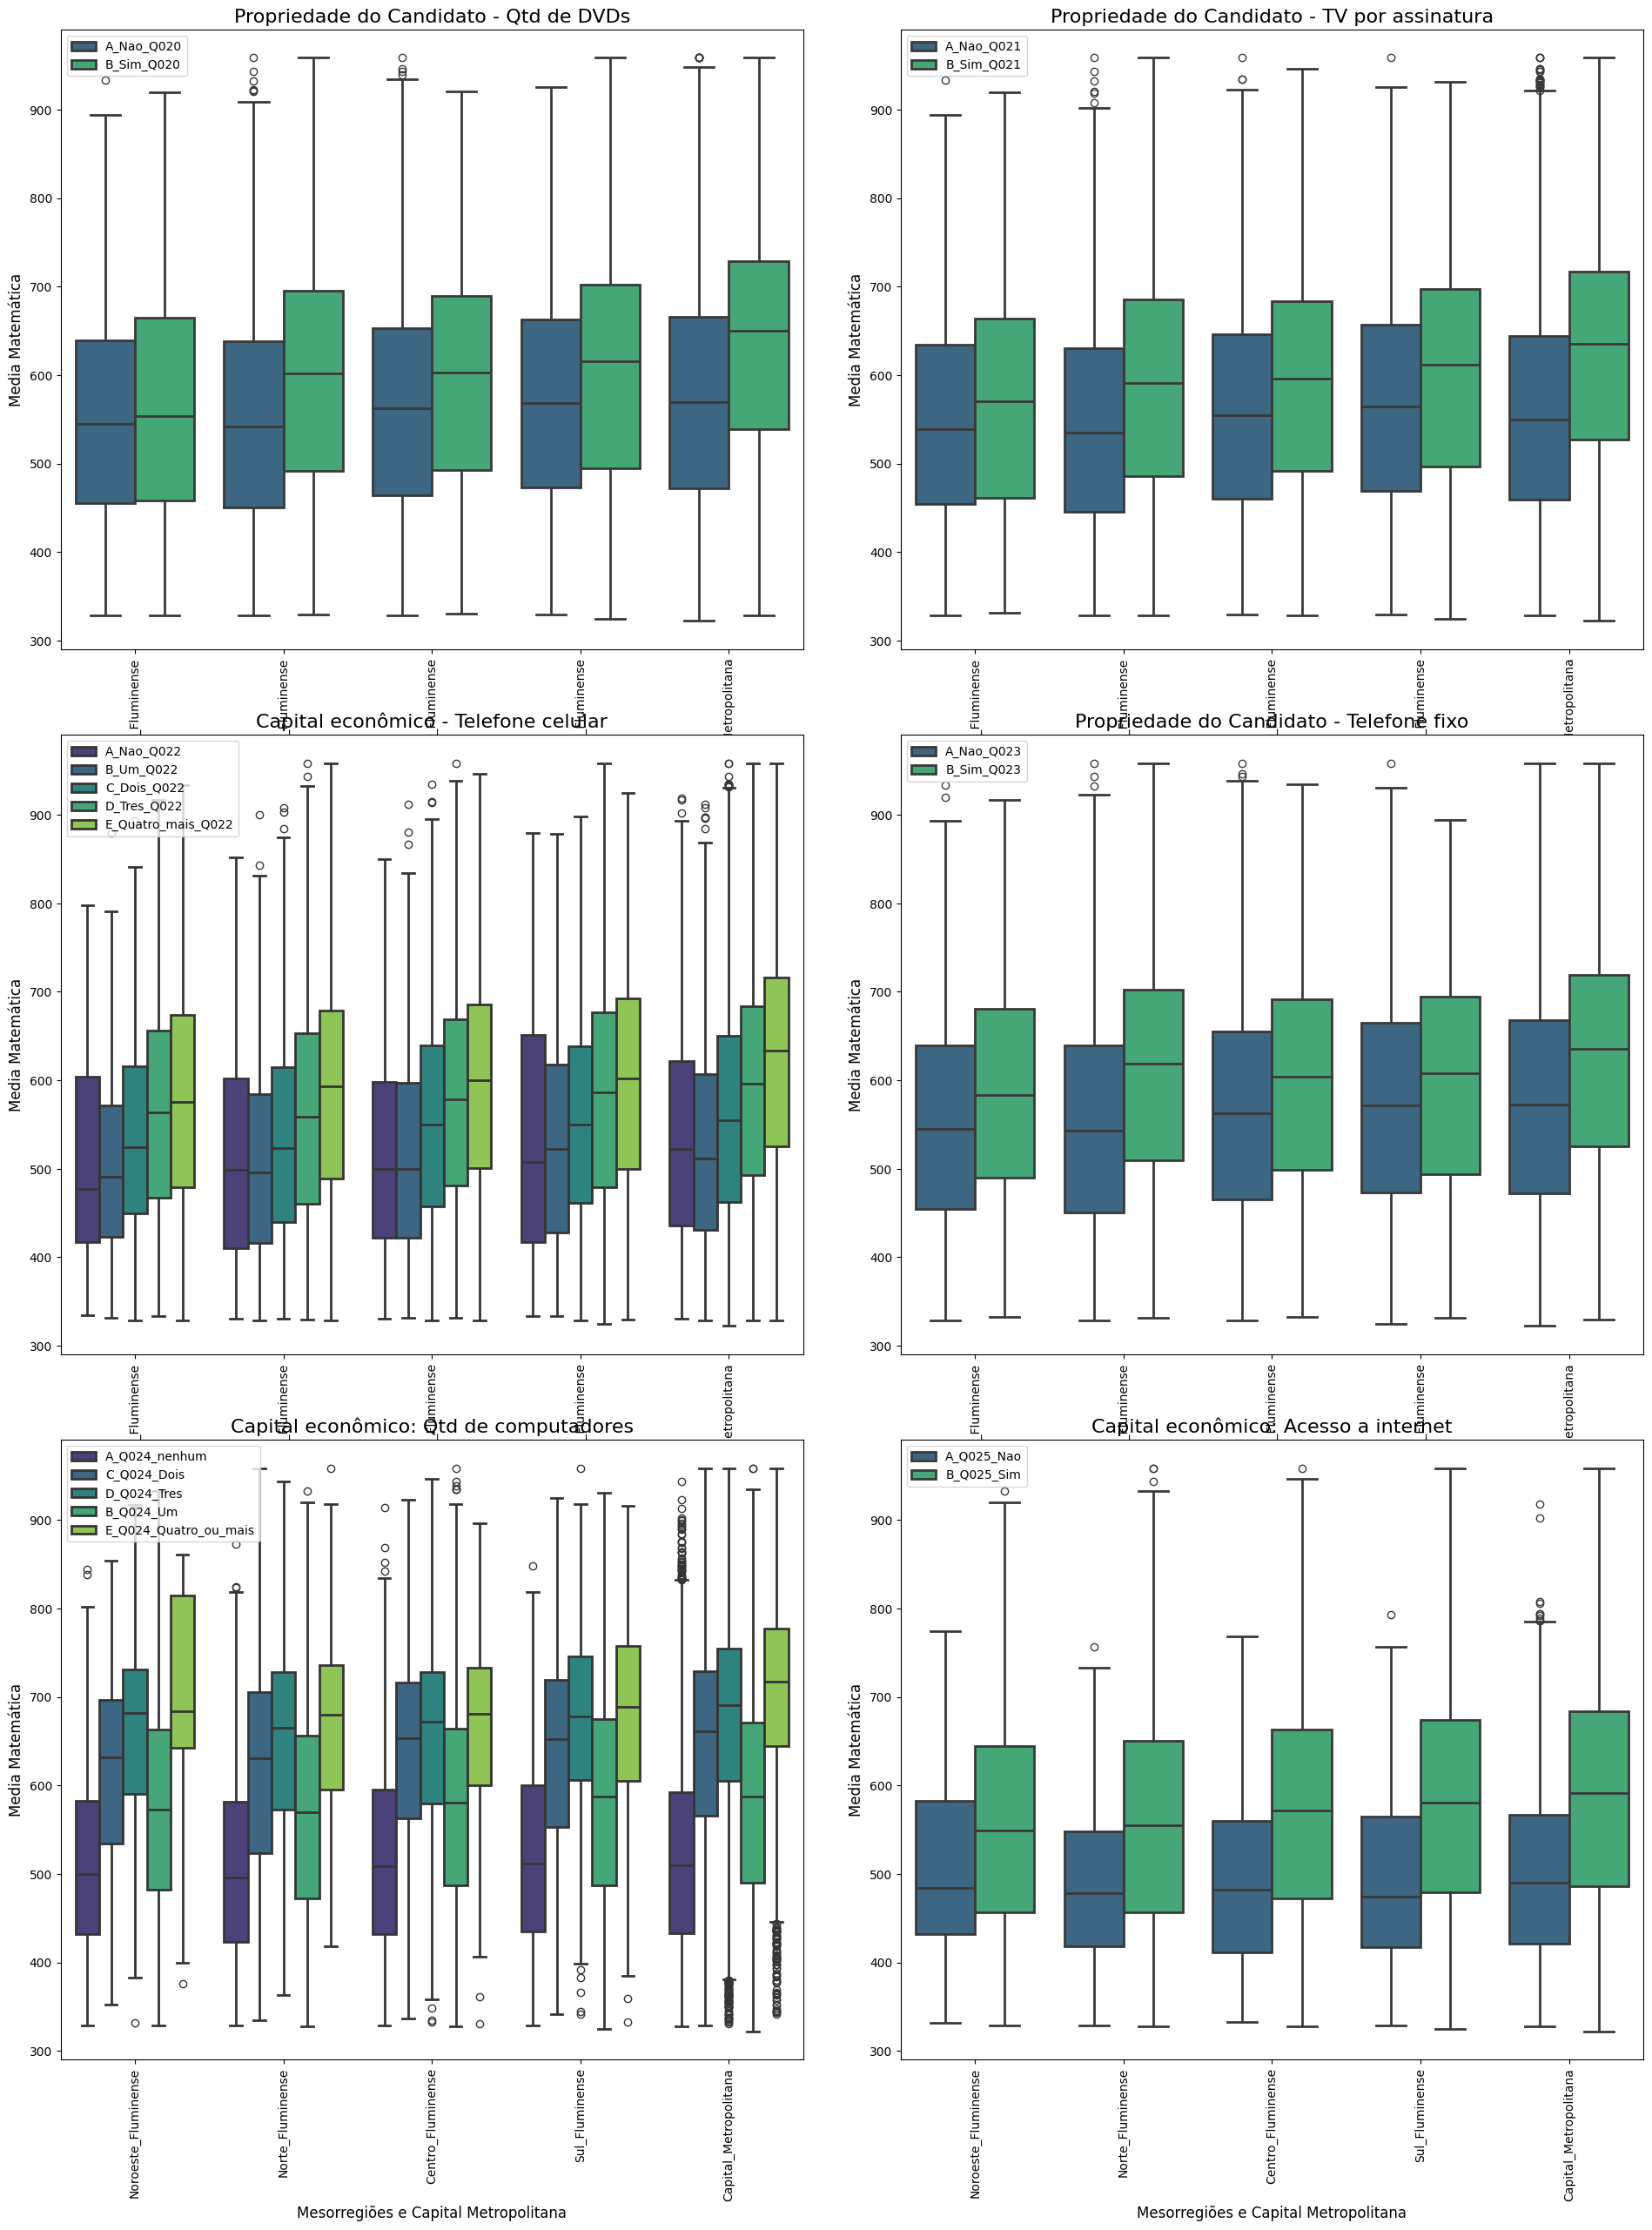

In [16]:
# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_MT', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Mesorregiões e Capital Metropolitana', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(3, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_MT'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 20: Qtd de DVDs (Q020)
sorted_df_20 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q020'])
plot_boxplot(axs[0, 0], sorted_df_20, ordem_categorias, 'Q020', 'Propriedade do Candidato - Qtd de DVDs')

# Gráfico 21: Qtd de TV por assinatura (Q021)
sorted_df_21 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q021'])
plot_boxplot(axs[0, 1], sorted_df_21, ordem_categorias, 'Q021', 'Propriedade do Candidato - TV por assinatura')

# Gráfico 22: Qtd de telefone celular (Q022)
sorted_df_22 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q022'])
plot_boxplot(axs[1, 0], sorted_df_22, ordem_categorias, 'Q022', 'Capital econômico - Telefone celular')

# Gráfico 23: Qtd de telefone fixo (Q023)
sorted_df_23 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q023'])
plot_boxplot(axs[1, 1], sorted_df_23, ordem_categorias, 'Q023', 'Propriedade do Candidato - Telefone fixo')

# Gráfico 24: Qtd de computadores (Q024)
sorted_df_24 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q024'])
plot_boxplot(axs[2, 0], sorted_df_23, ordem_categorias, 'Q024', 'Capital econômico: Qtd de computadores')

# Gráfico 25: Qtd de computadores (Q025)
sorted_df_25 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q025'])
plot_boxplot(axs[2, 1], sorted_df_25, ordem_categorias, 'Q025', 'Capital econômico: Acesso a internet')

In [17]:
## Redação
Educacao_enem_bin_muni_02 = Educacao_enem_bin_mt_muni_02 

## REDAÇÃO

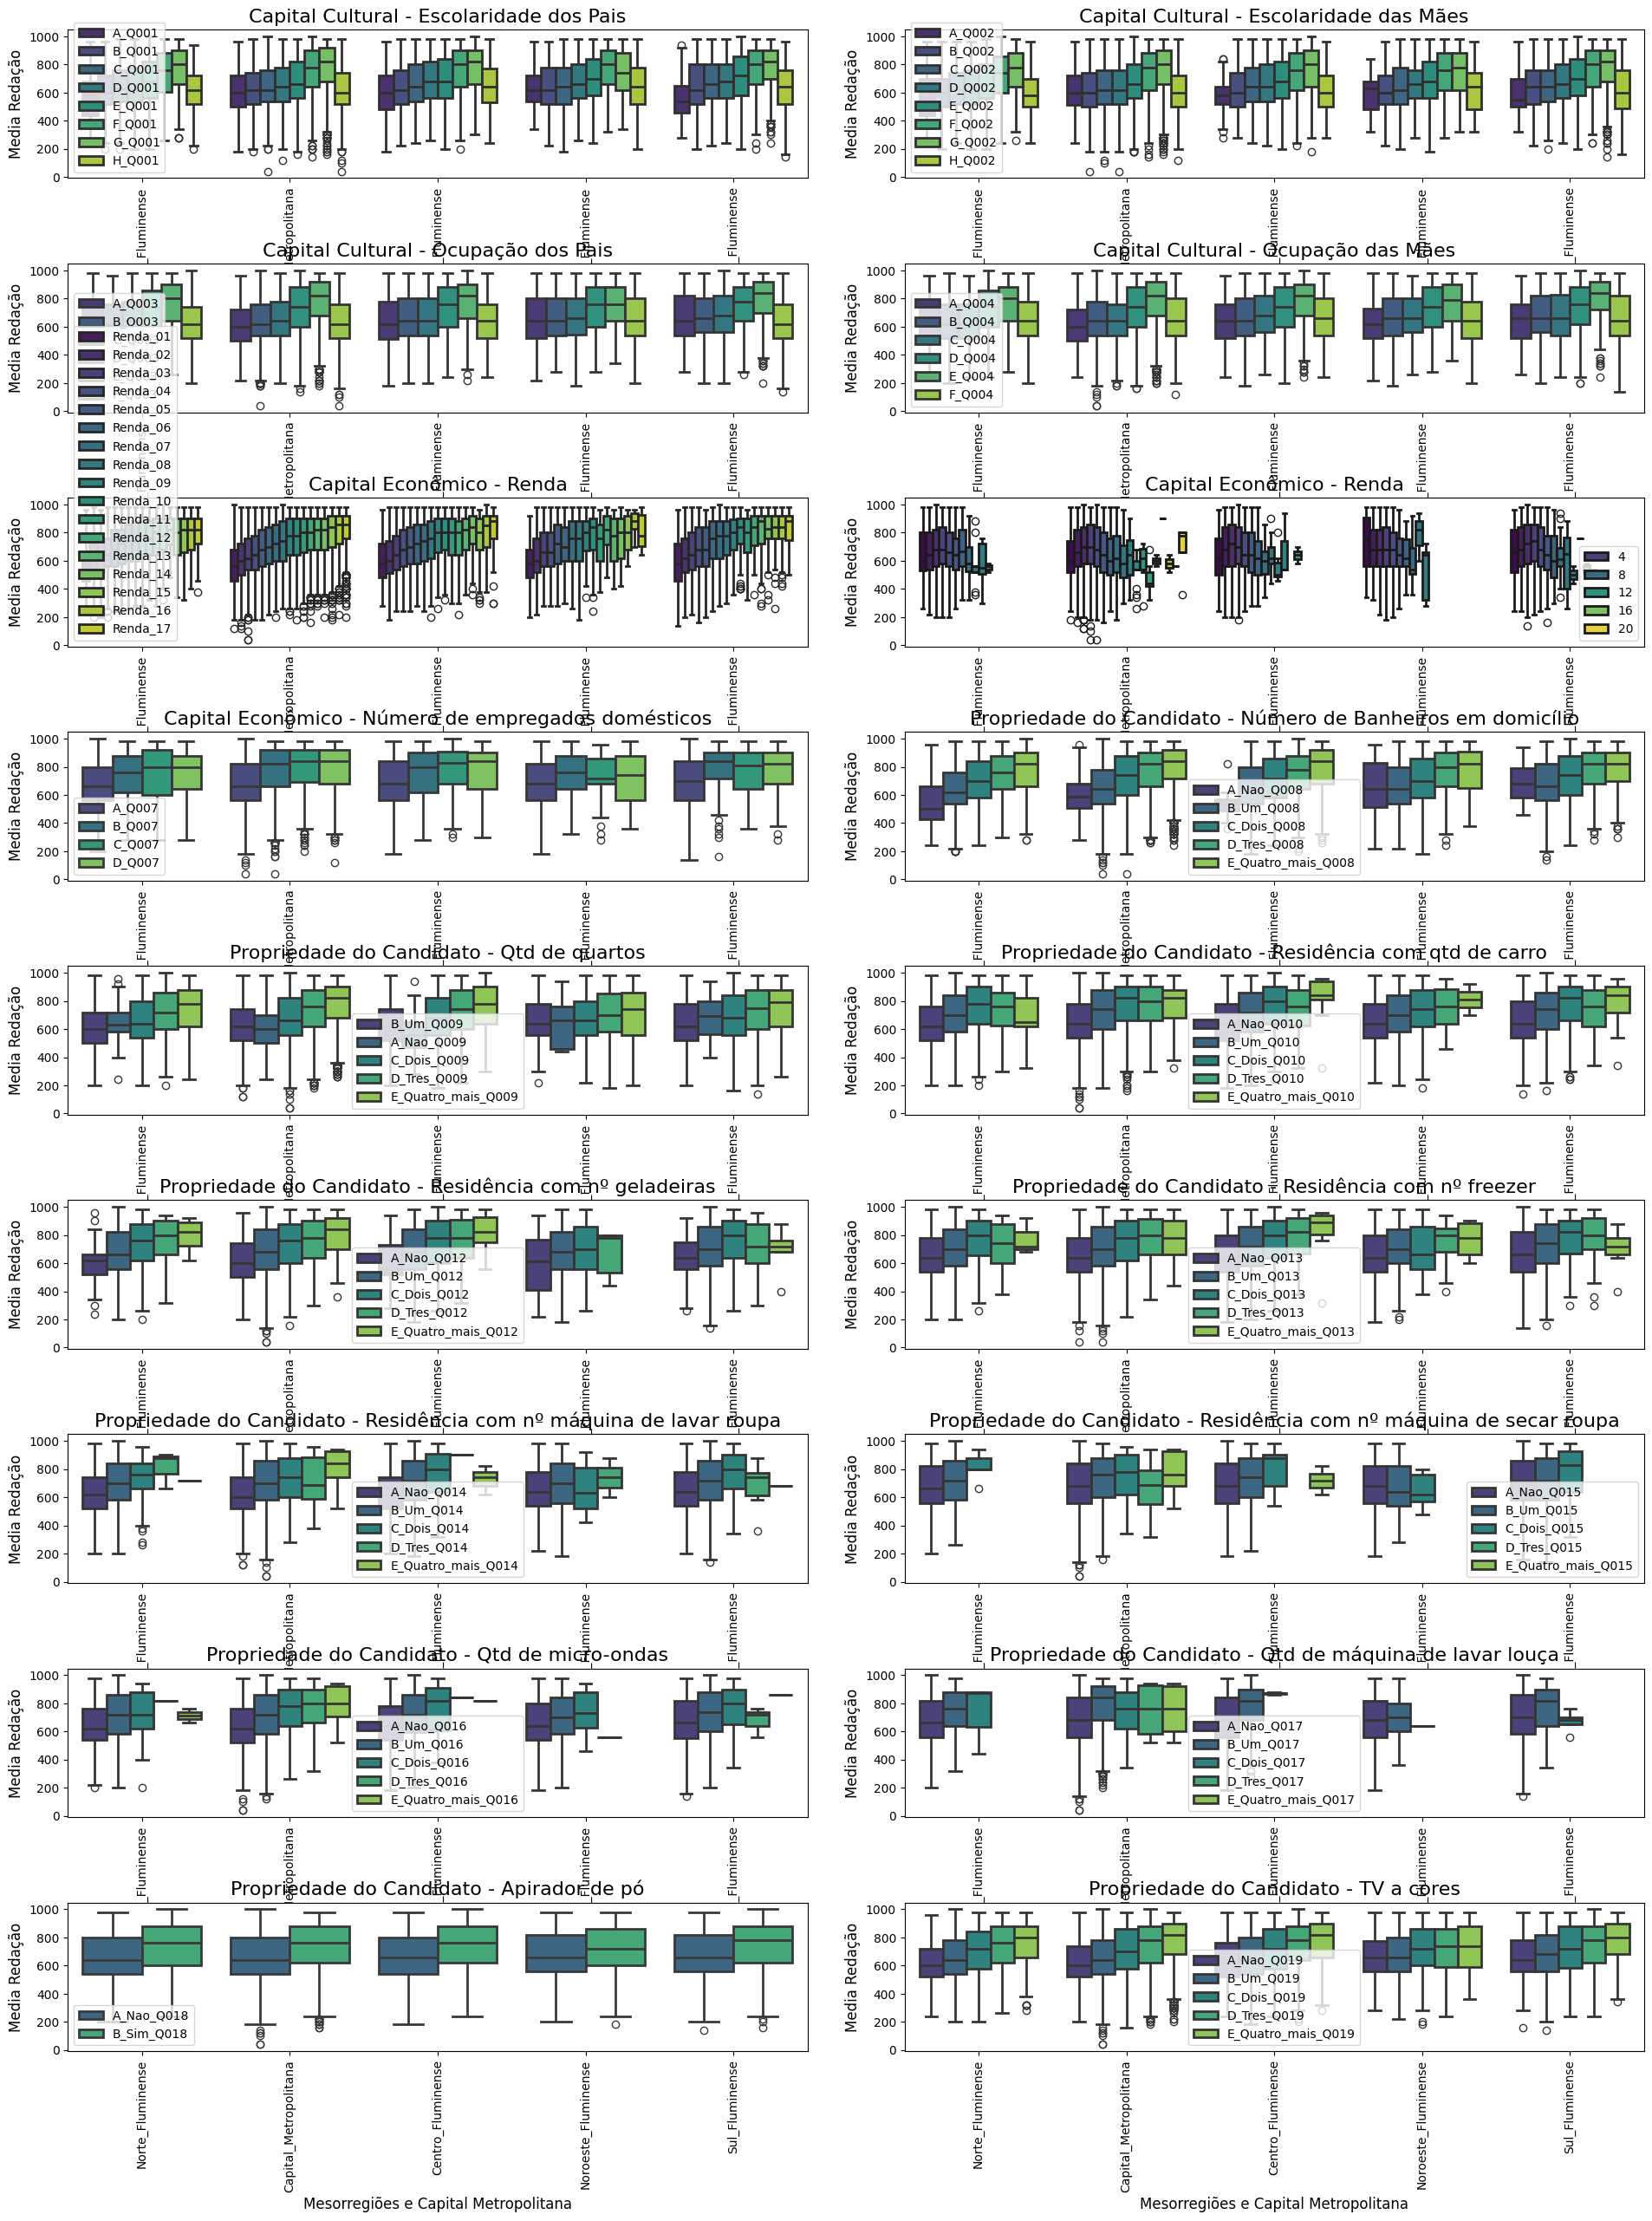

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_REDACAO', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Redação', fontsize=12)
    ax.set_xlabel('Mesorregiões e Capital Metropolitana', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)


# Subplots layout
fig, axs = plt.subplots(9, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_muni_02.groupby('Meso_Regiao')['NU_NOTA_REDACAO'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 1: Escolaridade dos Pais (Q001)
sorted_df_1 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q001'])
plot_boxplot(axs[0, 0], sorted_df_1, ordem_categorias, 'Q001', 'Capital Cultural - Escolaridade dos Pais')

# Gráfico 2: Escolaridade das Mães (Q002)
sorted_df_2 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q002'])
plot_boxplot(axs[0, 1], sorted_df_2, ordem_categorias, 'Q002', 'Capital Cultural - Escolaridade das Mães')

# Gráfico 3: Ocupação dos Pais (Q003)
sorted_df_3 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q003'])
plot_boxplot(axs[1, 0], sorted_df_3, ordem_categorias, 'Q003', 'Capital Cultural - Ocupação dos Pais')

# Gráfico 4: Ocupação das Mães (Q004)
sorted_df_4 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q004'])
plot_boxplot(axs[1, 1], sorted_df_4, ordem_categorias, 'Q004', 'Capital Cultural - Ocupação das Mães')

# Gráfico 5: Renda (Q006)
sorted_df_5 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q006'])
plot_boxplot(axs[2, 0], sorted_df_5, ordem_categorias, 'Q006', 'Capital Econômico - Renda')

# Gráfico 6: Número de pessoas por residência (Q005)
sorted_df_6 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q005'])
plot_boxplot(axs[2, 1], sorted_df_6, ordem_categorias, 'Q005', 'Capital Econômico - Renda')


# Gráfico 7: Número de empregados domésticos (Q007)
sorted_df_7 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q007'])
plot_boxplot(axs[3, 0], sorted_df_7, ordem_categorias, 'Q007', 'Capital Econômico - Número de empregados domésticos')

# Gráfico 8: Qtd de banheiros (Q008)
sorted_df_8 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q008'])
plot_boxplot(axs[3, 1], sorted_df_8, ordem_categorias, 'Q008', 'Propriedade do Candidato - Número de Banheiros em domicílio')

# Gráfico 9: Qtd de quartos (Q009)
sorted_df_9 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q009'])
plot_boxplot(axs[4, 0], sorted_df_8, ordem_categorias, 'Q009', 'Propriedade do Candidato - Qtd de quartos')

# Gráfico 10: Qtd de carros (Q010)
sorted_df_10 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q010'])
plot_boxplot(axs[4, 1], sorted_df_10, ordem_categorias, 'Q010', 'Propriedade do Candidato - Residência com qtd de carro')

# Gráfico 12: Qtd de geladeiras (Q011)
sorted_df_12 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q012'])
plot_boxplot(axs[5, 0], sorted_df_12, ordem_categorias, 'Q012', 'Propriedade do Candidato - Residência com nº geladeiras')

# Gráfico 13: Qtd de Freezers (Q013)
sorted_df_13 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q013'])
plot_boxplot(axs[5, 1], sorted_df_13, ordem_categorias, 'Q013', 'Propriedade do Candidato - Residência com nº freezer')

# Gráfico 14: Qtd de Lavar Roupa (Q014)
sorted_df_14 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q014'])
plot_boxplot(axs[6, 0], sorted_df_14, ordem_categorias, 'Q014', 'Propriedade do Candidato - Residência com nº máquina de lavar roupa')

# Gráfico 15: Qtd de Secar Roupa (Q015)
sorted_df_15 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q015'])
plot_boxplot(axs[6, 1], sorted_df_15, ordem_categorias, 'Q015', 'Propriedade do Candidato - Residência com nº máquina de secar roupa')

# Gráfico 16: Qtd de Microondas (Q016)
sorted_df_16 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q016'])
plot_boxplot(axs[7, 0], sorted_df_16, ordem_categorias, 'Q016', 'Propriedade do Candidato - Qtd de micro-ondas')

# Gráfico 17: Qtd de Lavar Louça (Q017)
sorted_df_17 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q017'])
plot_boxplot(axs[7, 1], sorted_df_17, ordem_categorias, 'Q017', 'Propriedade do Candidato - Qtd de máquina de lavar louça')

# Gráfico 18: Qtd Aspirador de Pó (Q018)
sorted_df_18 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q018'])
plot_boxplot(axs[8, 0], sorted_df_18, ordem_categorias, 'Q018', 'Propriedade do Candidato - Apirador de pó')

# Gráfico 19: Qtd de TV a cores (Q019)
sorted_df_19 = Educacao_enem_bin_muni_02.sort_values(by=['Meso_Regiao', 'Q019'])
plot_boxplot(axs[8, 1], sorted_df_19, ordem_categorias, 'Q019', 'Propriedade do Candidato - TV a cores')

'''
# Gráfico 8: Número de TVs a cores (Q019)
sorted_df_8 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q019'])
plot_boxplot(axs[3, 1], sorted_df_8, ordem_categorias, 'Q019', 'Capital Econômico - Número de TVs a cores')

# Gráfico 9: TV por assinatura (Q021)
sorted_df_9 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q021'])
plot_boxplot(axs[4, 0], sorted_df_9, ordem_categorias, 'Q021', 'Capital Econômico - TV por assinatura')

# Gráfico 10: Telefone celular (Q022)
sorted_df_10 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q022'])
plot_boxplot(axs[4, 1], sorted_df_10, ordem_categorias, 'Q022', 'Capital Econômico - Telefone celular')
'''
# Exibir o gráfico
plt.show()

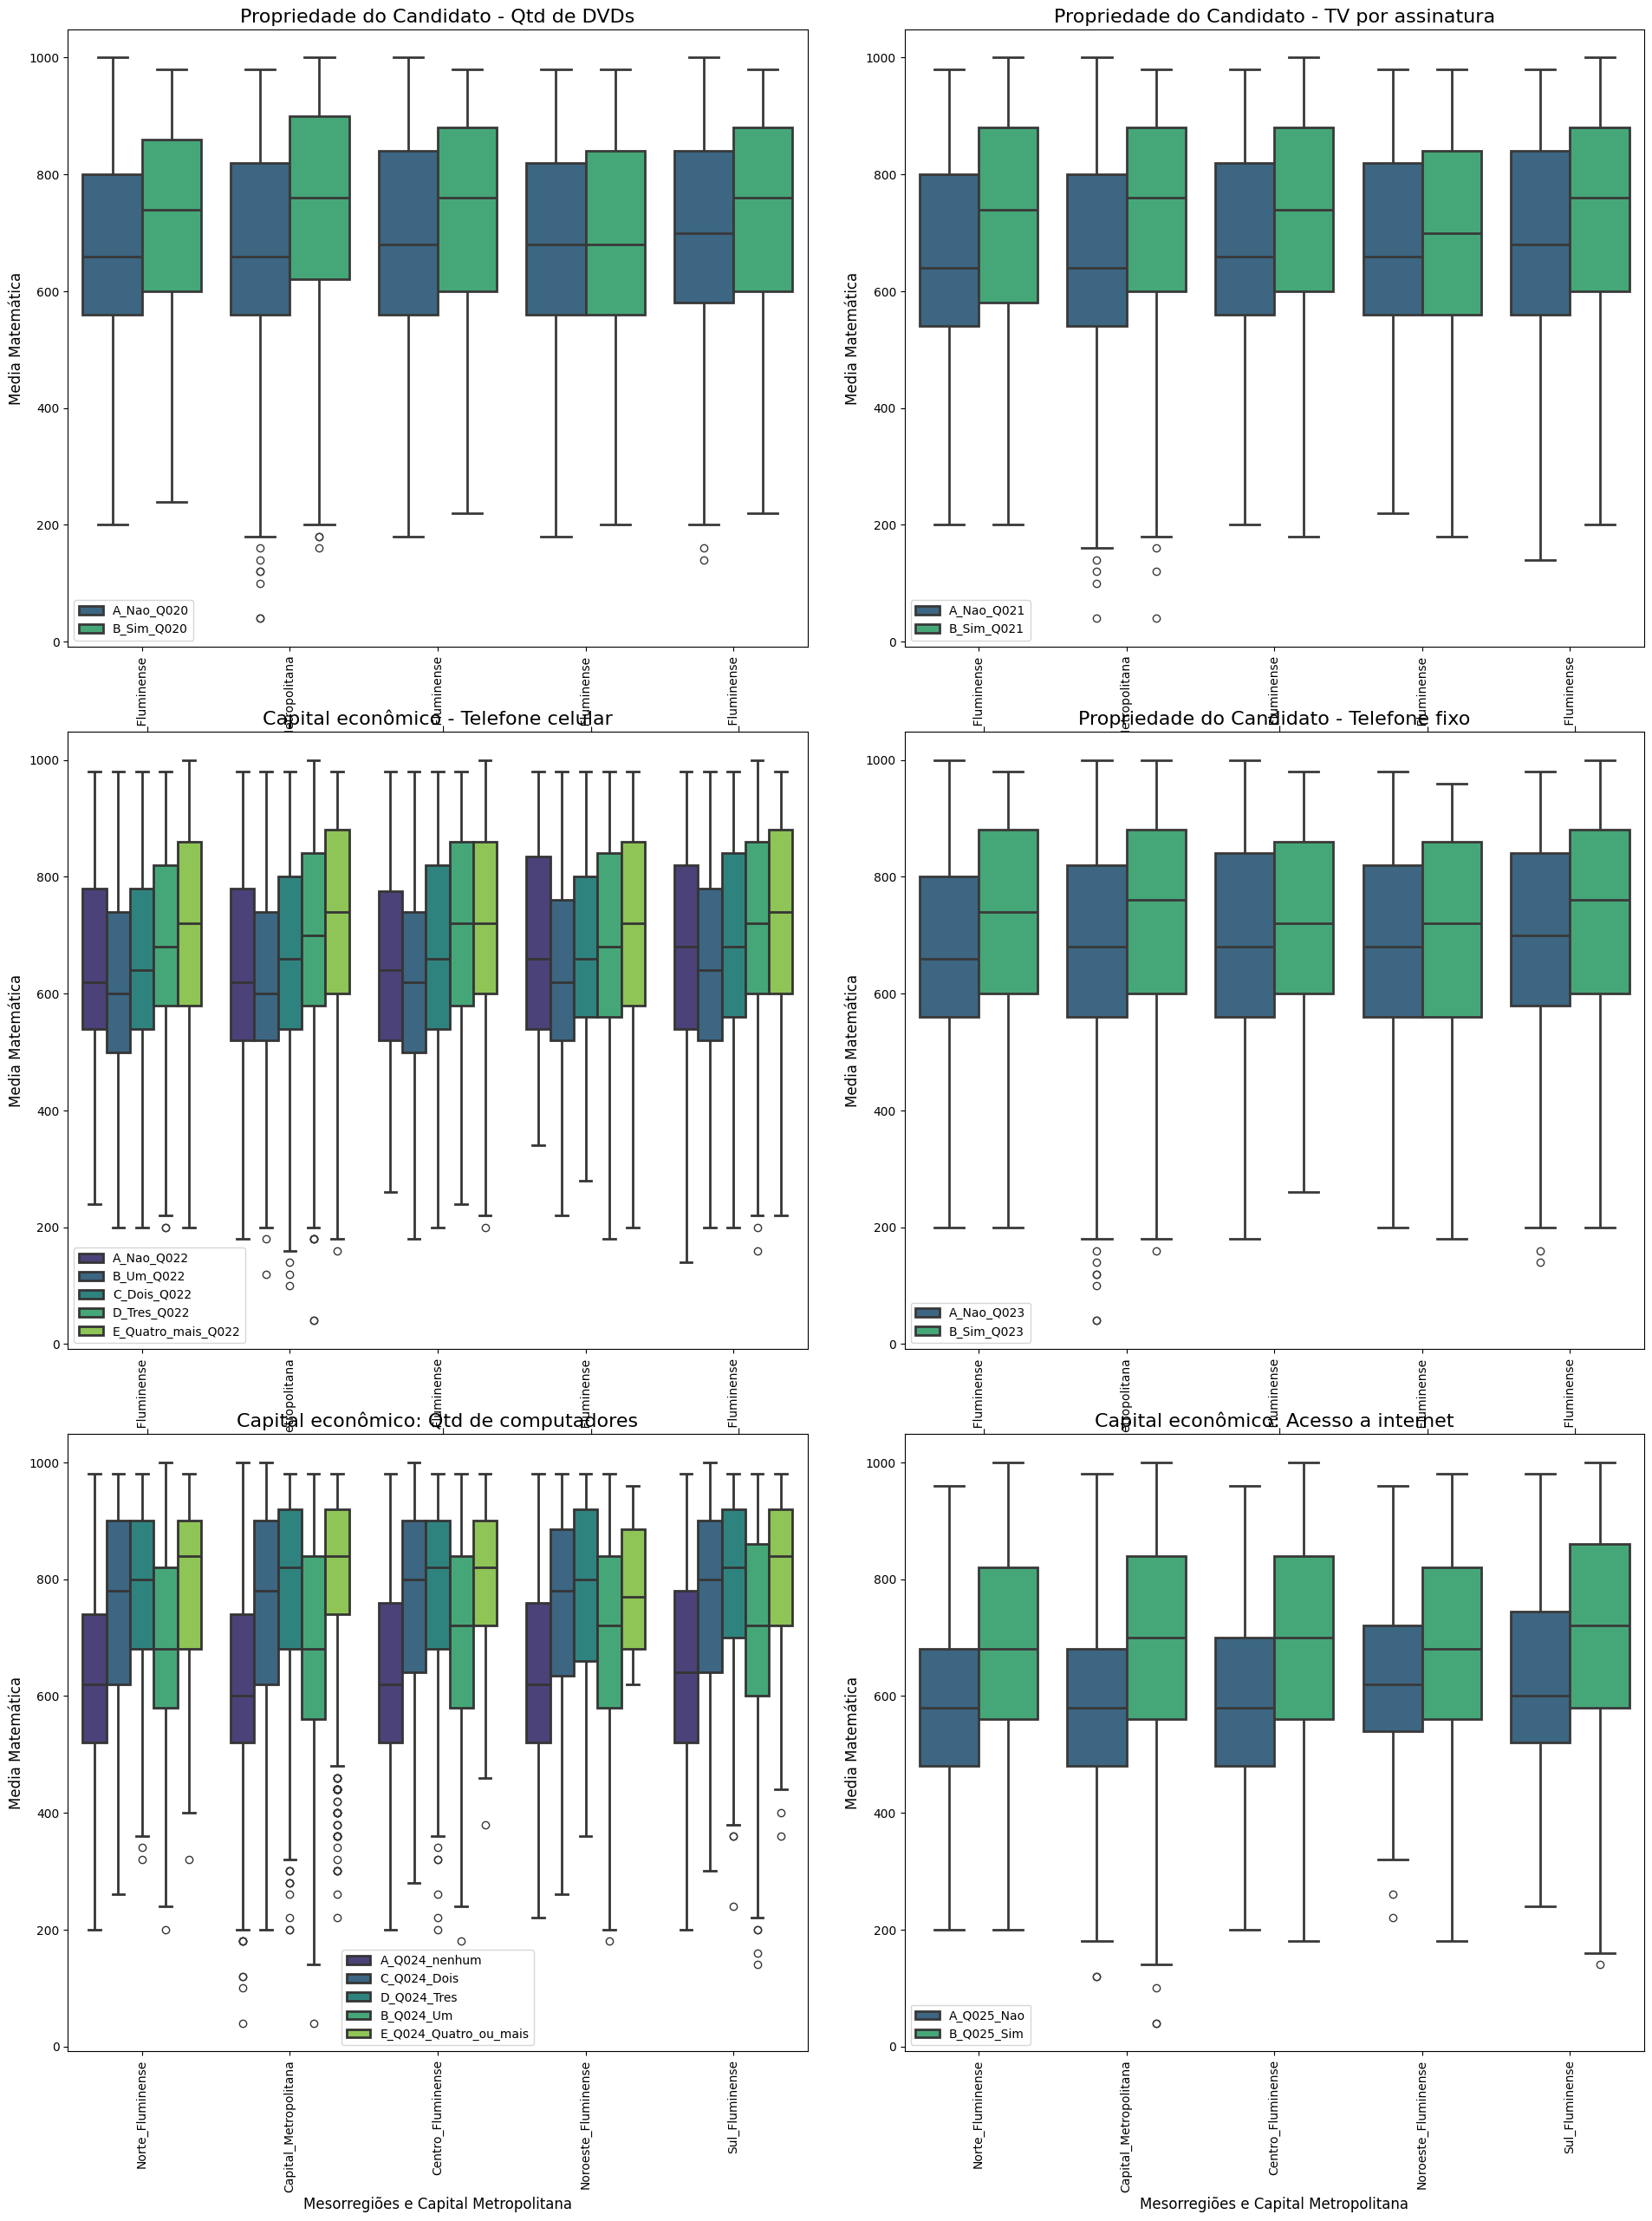

In [19]:
# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_REDACAO', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Mesorregiões e Capital Metropolitana', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(3, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_REDACAO'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 20: Qtd de DVDs (Q020)
sorted_df_20 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q020'])
plot_boxplot(axs[0, 0], sorted_df_20, ordem_categorias, 'Q020', 'Propriedade do Candidato - Qtd de DVDs')

# Gráfico 21: Qtd de TV por assinatura (Q021)
sorted_df_21 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q021'])
plot_boxplot(axs[0, 1], sorted_df_21, ordem_categorias, 'Q021', 'Propriedade do Candidato - TV por assinatura')

# Gráfico 22: Qtd de telefone celular (Q022)
sorted_df_22 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q022'])
plot_boxplot(axs[1, 0], sorted_df_22, ordem_categorias, 'Q022', 'Capital econômico - Telefone celular')

# Gráfico 23: Qtd de telefone fixo (Q023)
sorted_df_23 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q023'])
plot_boxplot(axs[1, 1], sorted_df_23, ordem_categorias, 'Q023', 'Propriedade do Candidato - Telefone fixo')

# Gráfico 24: Qtd de computadores (Q024)
sorted_df_24 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q024'])
plot_boxplot(axs[2, 0], sorted_df_23, ordem_categorias, 'Q024', 'Capital econômico: Qtd de computadores')

# Gráfico 25: Qtd de computadores (Q025)
sorted_df_25 = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'Q025'])
plot_boxplot(axs[2, 1], sorted_df_25, ordem_categorias, 'Q025', 'Capital econômico: Acesso a internet')

#### Retirando opções de não respondeu para não afetar modelo final: Divisão entre Metropolitana e Mesorregiões para instituições e estabelecimentos públicos e privados

In [20]:
## Retirando opção não respondeu: capital

Educacao_enem_bin_mt_muni_02_RJ = Educacao_enem_bin_mt_muni_02[Educacao_enem_bin_mt_muni_02['Meso_Regiao'] == 'Capital_Metropolitana']
Educacao_enem_bin_mt_muni_02_RJ = Educacao_enem_bin_mt_muni_02[Educacao_enem_bin_mt_muni_02['TP_ESCOLA'] != 'Naorespondeu']

## MATEMÁTICA

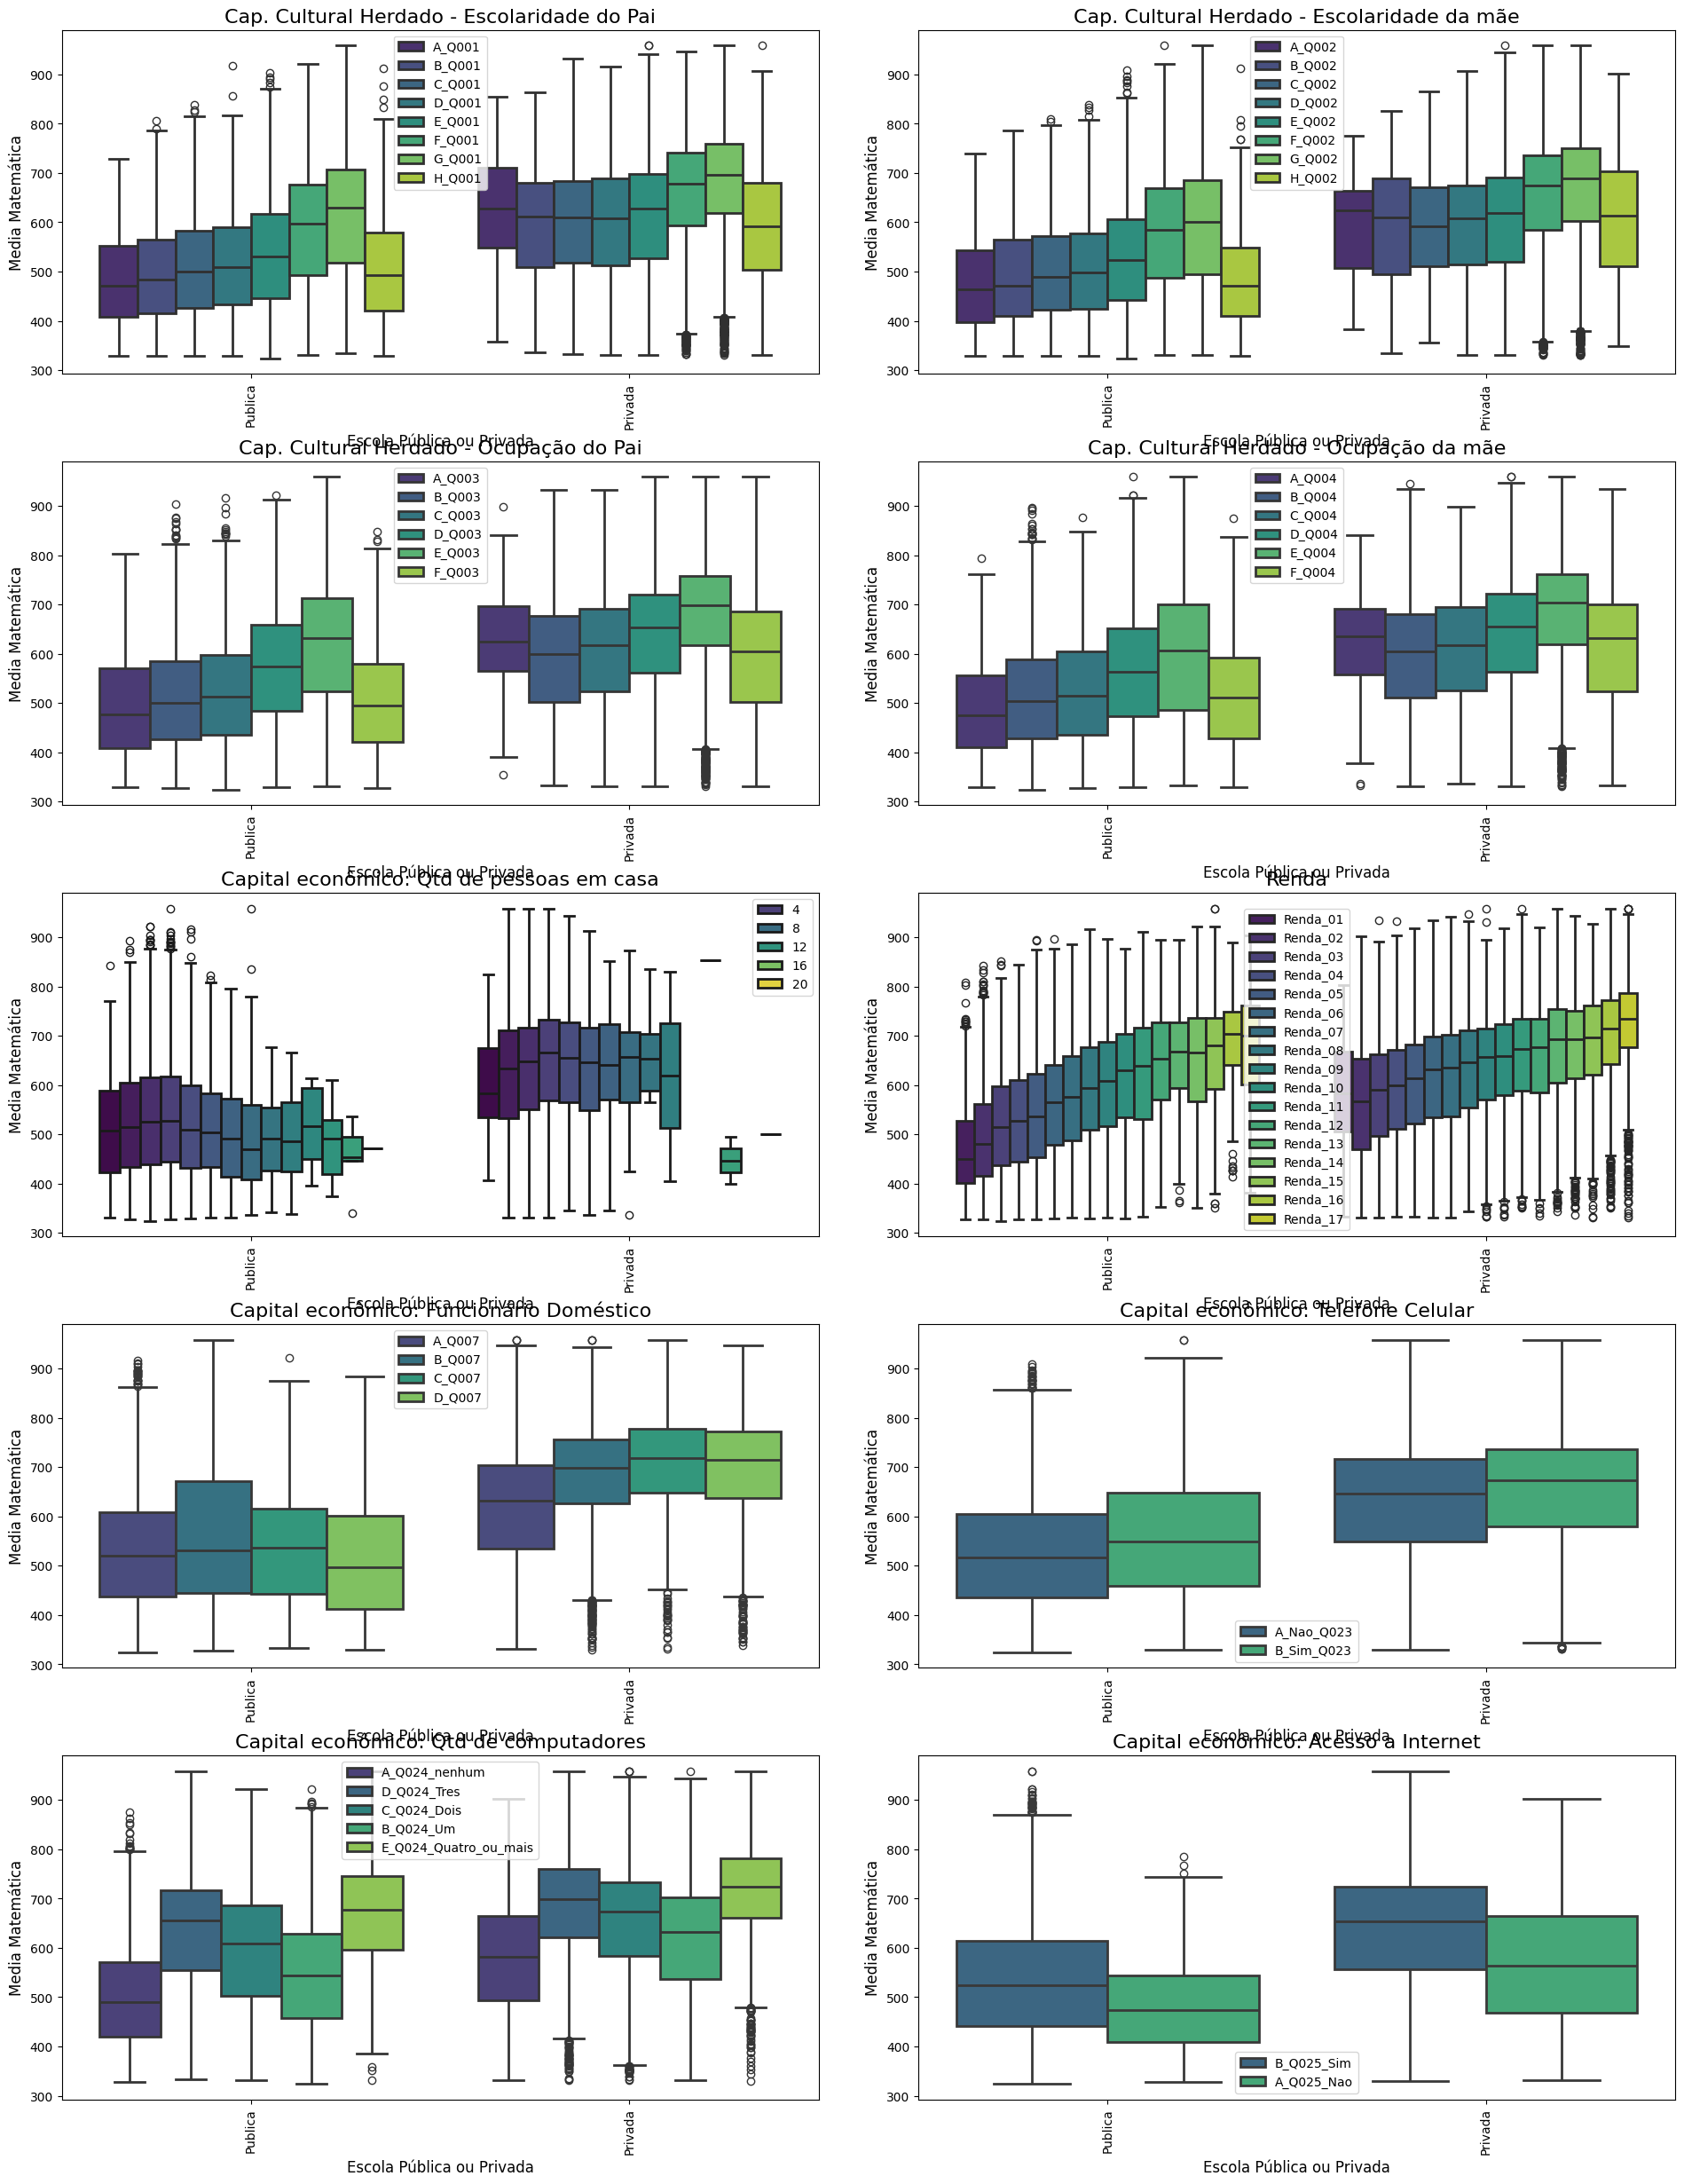

In [21]:
## Box plots para tipo escolar: Matemática - Capital Metropolitana

# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='TP_ESCOLA', y='NU_NOTA_MT', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Escola Pública ou Privada', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02_RJ.groupby('TP_ESCOLA')['NU_NOTA_MT'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 01: Qtd de DVDs (Q001)
sorted_df_01 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q001'])
plot_boxplot(axs[0, 0], sorted_df_01, ordem_categorias, 'Q001', 'Cap. Cultural Herdado - Escolaridade do Pai')

# Gráfico 02: Qtd de TV por assinatura (Q002)
sorted_df_02 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q002'])
plot_boxplot(axs[0, 1], sorted_df_02, ordem_categorias, 'Q002', 'Cap. Cultural Herdado - Escolaridade da mãe')

# Gráfico 03: Qtd de telefone celular (Q003)
sorted_df_03 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q003'])
plot_boxplot(axs[1, 0], sorted_df_03, ordem_categorias, 'Q003', 'Cap. Cultural Herdado - Ocupação do Pai')

# Gráfico 04: Qtd de telefone fixo (Q004)
sorted_df_04 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q004'])
plot_boxplot(axs[1, 1], sorted_df_04, ordem_categorias, 'Q004', 'Cap. Cultural Herdado - Ocupação da mãe')

# Gráfico 05: Qtd de computadores (Q005)
sorted_df_05 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q005'])
plot_boxplot(axs[2, 0], sorted_df_05, ordem_categorias, 'Q005', 'Capital econômico: Qtd de pessoas em casa')

# Gráfico 06: Qtd de computadores (Q006)
sorted_df_06 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q006'])
plot_boxplot(axs[2, 1], sorted_df_06, ordem_categorias, 'Q006', 'Renda')

# Gráfico 07: Qtd de computadores (Q007)
sorted_df_07 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q007'])
plot_boxplot(axs[3, 0], sorted_df_07, ordem_categorias, 'Q007', 'Capital econômico: Funcionário Doméstico')

# Gráfico 08: Qtd de computadores (Q023)
sorted_df_08 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q023'])
plot_boxplot(axs[3, 1], sorted_df_07, ordem_categorias, 'Q023', 'Capital econômico: Telefone Celular')

# Gráfico 09: Qtd de computadores (Q024)
sorted_df_09 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q024'])
plot_boxplot(axs[4, 0], sorted_df_08, ordem_categorias, 'Q024', 'Capital econômico: Qtd de computadores')

# Gráfico 10: Qtd de computadores (Q025)
sorted_df_10 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q025'])
plot_boxplot(axs[4, 1], sorted_df_09, ordem_categorias, 'Q025', 'Capital econômico: Acesso a Internet')

## REDAÇÃO

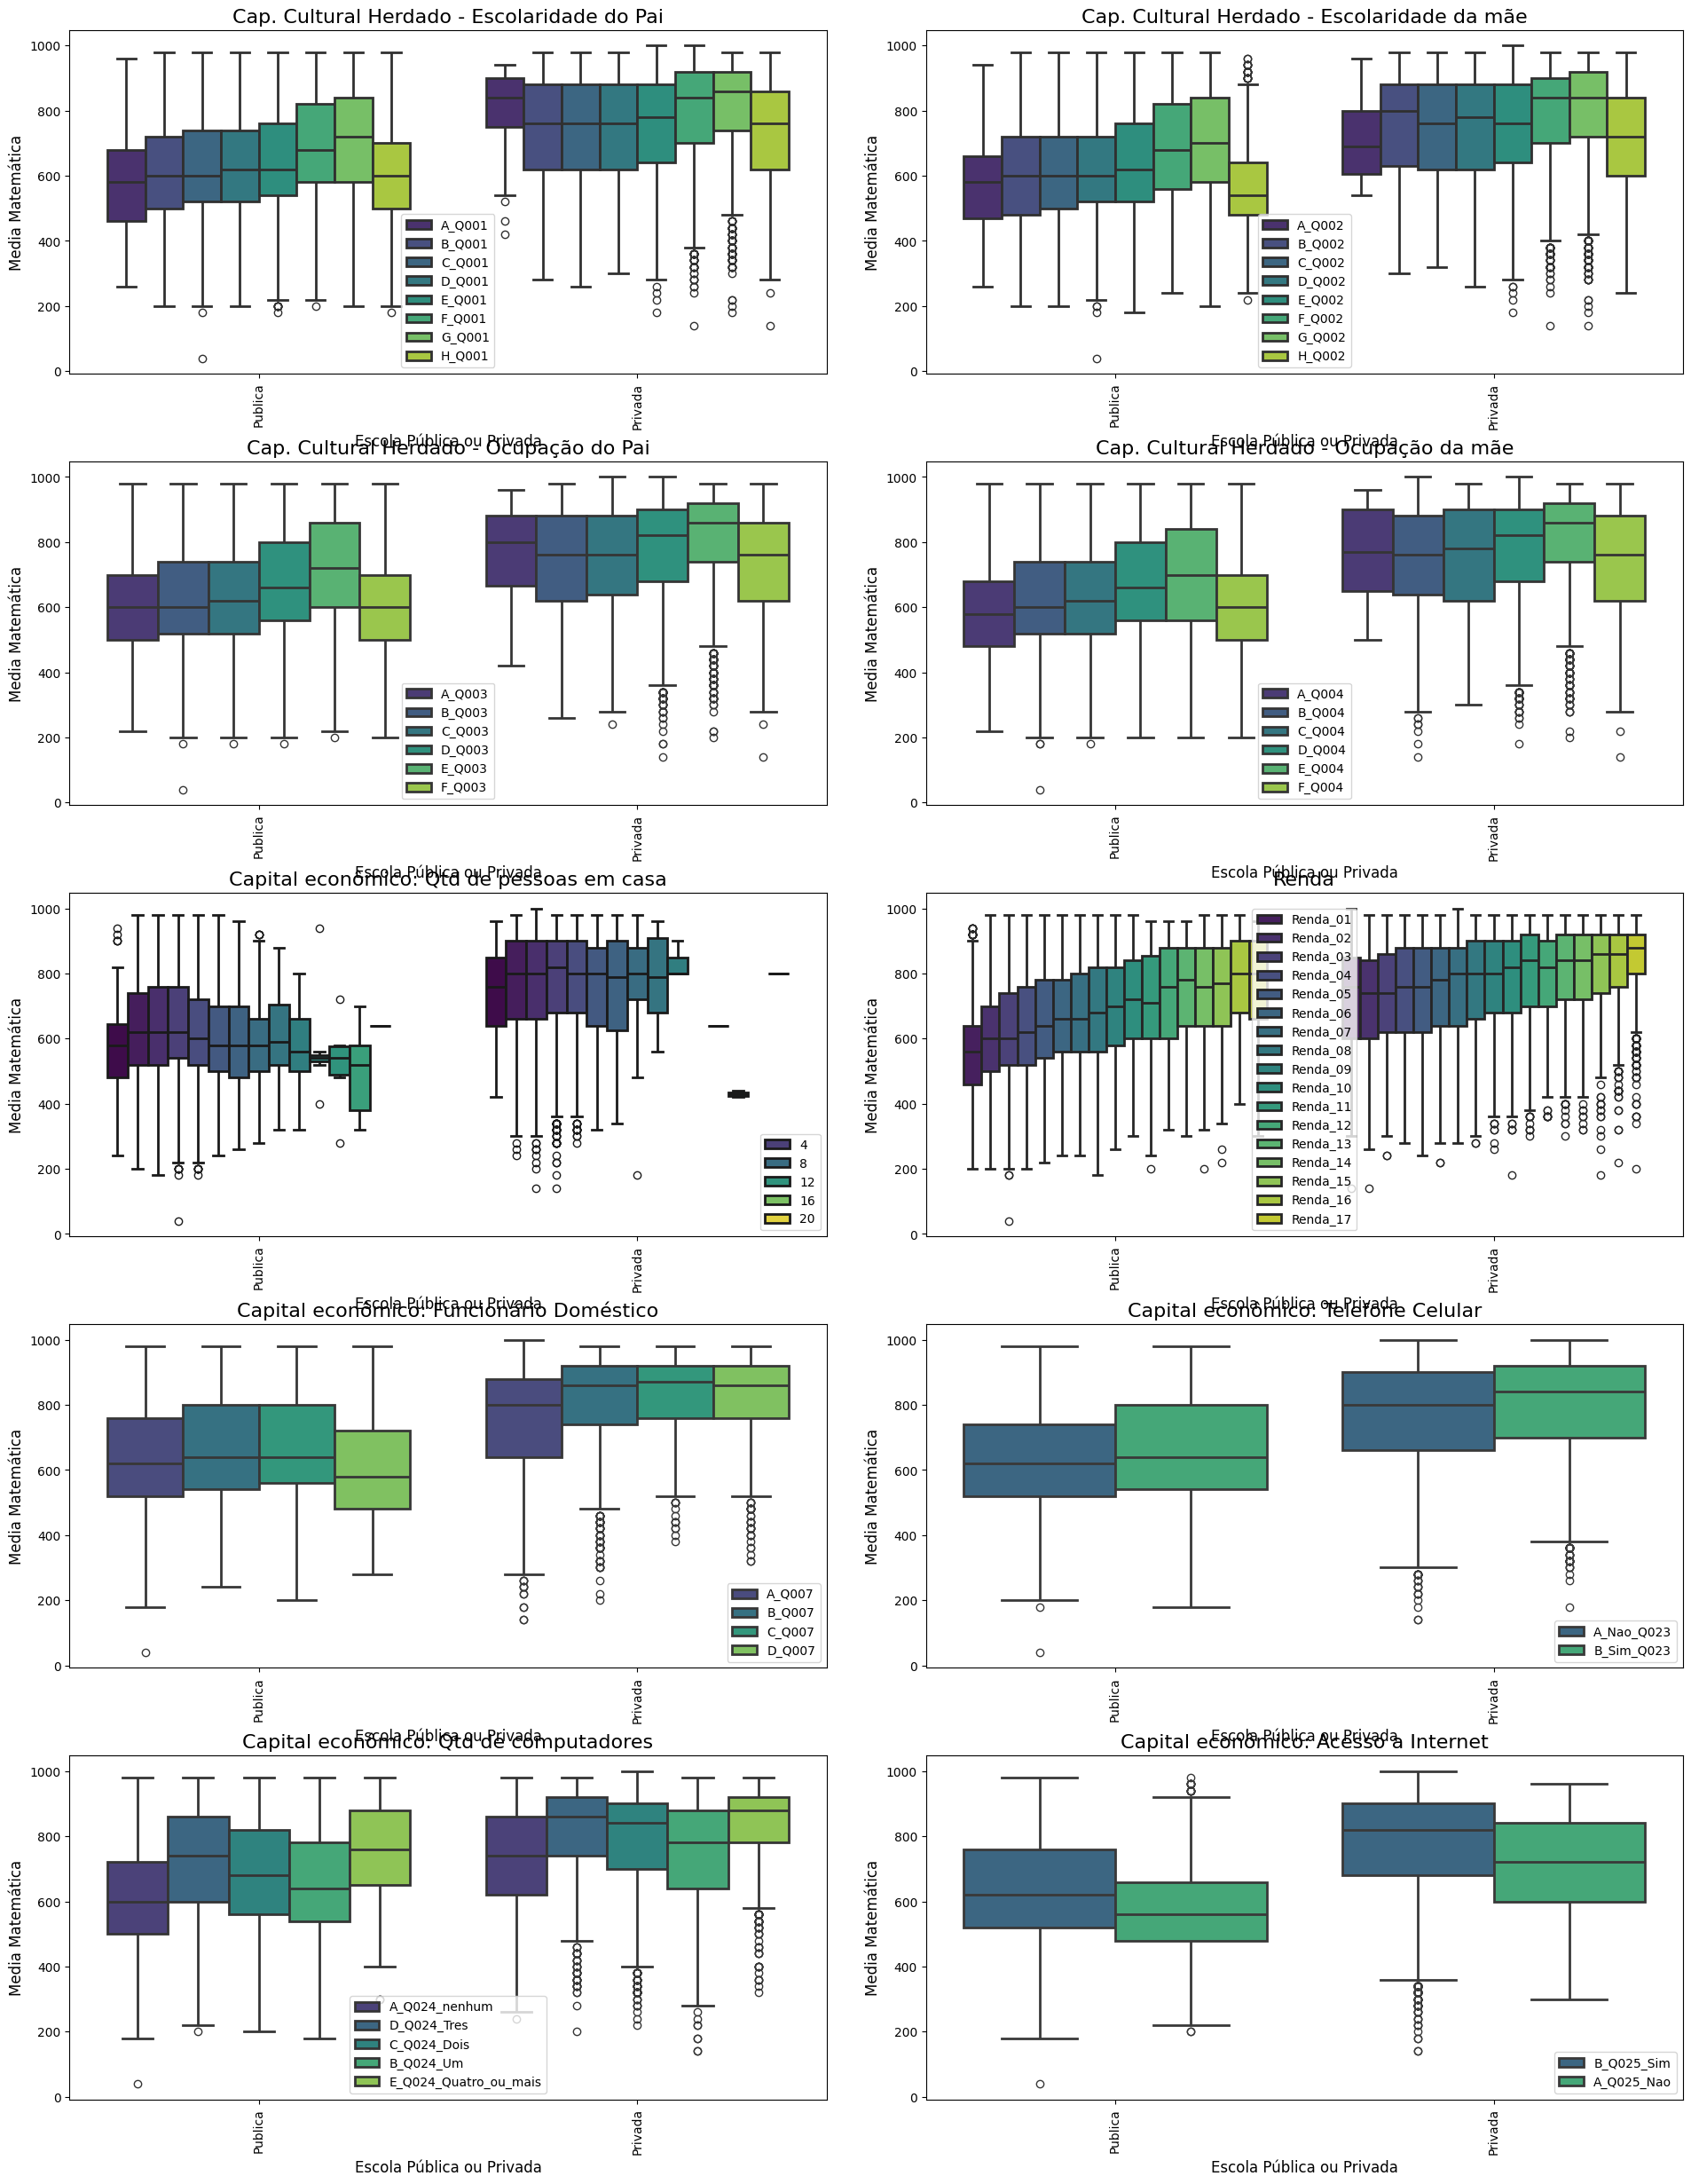

In [22]:
## Box plots para tipo escolar: Matemática - Capital Metropolitana

# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='TP_ESCOLA', y='NU_NOTA_REDACAO', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Escola Pública ou Privada', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02_RJ.groupby('TP_ESCOLA')['NU_NOTA_REDACAO'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 01: Qtd de DVDs (Q001)
sorted_df_01 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q001'])
plot_boxplot(axs[0, 0], sorted_df_01, ordem_categorias, 'Q001', 'Cap. Cultural Herdado - Escolaridade do Pai')

# Gráfico 02: Qtd de TV por assinatura (Q002)
sorted_df_02 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q002'])
plot_boxplot(axs[0, 1], sorted_df_02, ordem_categorias, 'Q002', 'Cap. Cultural Herdado - Escolaridade da mãe')

# Gráfico 03: Qtd de telefone celular (Q003)
sorted_df_03 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q003'])
plot_boxplot(axs[1, 0], sorted_df_03, ordem_categorias, 'Q003', 'Cap. Cultural Herdado - Ocupação do Pai')

# Gráfico 04: Qtd de telefone fixo (Q004)
sorted_df_04 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q004'])
plot_boxplot(axs[1, 1], sorted_df_04, ordem_categorias, 'Q004', 'Cap. Cultural Herdado - Ocupação da mãe')

# Gráfico 05: Qtd de computadores (Q005)
sorted_df_05 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q005'])
plot_boxplot(axs[2, 0], sorted_df_05, ordem_categorias, 'Q005', 'Capital econômico: Qtd de pessoas em casa')

# Gráfico 06: Qtd de computadores (Q006)
sorted_df_06 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q006'])
plot_boxplot(axs[2, 1], sorted_df_06, ordem_categorias, 'Q006', 'Renda')

# Gráfico 07: Qtd de computadores (Q007)
sorted_df_07 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q007'])
plot_boxplot(axs[3, 0], sorted_df_07, ordem_categorias, 'Q007', 'Capital econômico: Funcionário Doméstico')

# Gráfico 08: Qtd de computadores (Q023)
sorted_df_08 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q023'])
plot_boxplot(axs[3, 1], sorted_df_07, ordem_categorias, 'Q023', 'Capital econômico: Telefone Celular')

# Gráfico 09: Qtd de computadores (Q024)
sorted_df_09 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q024'])
plot_boxplot(axs[4, 0], sorted_df_08, ordem_categorias, 'Q024', 'Capital econômico: Qtd de computadores')

# Gráfico 10: Qtd de computadores (Q025)
sorted_df_10 = Educacao_enem_bin_mt_muni_02_RJ.sort_values(by=['TP_ESCOLA', 'Q025'])
plot_boxplot(axs[4, 1], sorted_df_09, ordem_categorias, 'Q025', 'Capital econômico: Acesso a Internet')


In [23]:
## Retirando opção não respondeu: Mesorregiões

Educacao_enem_bin_mt_muni_02_Meso = Educacao_enem_bin_mt_muni_02[Educacao_enem_bin_mt_muni_02['Meso_Regiao'] != 'Capital_Metropolitana']
Educacao_enem_bin_mt_muni_02_Meso = Educacao_enem_bin_mt_muni_02[Educacao_enem_bin_mt_muni_02['TP_ESCOLA'] != 'Naorespondeu']

## MATEMÁTICA

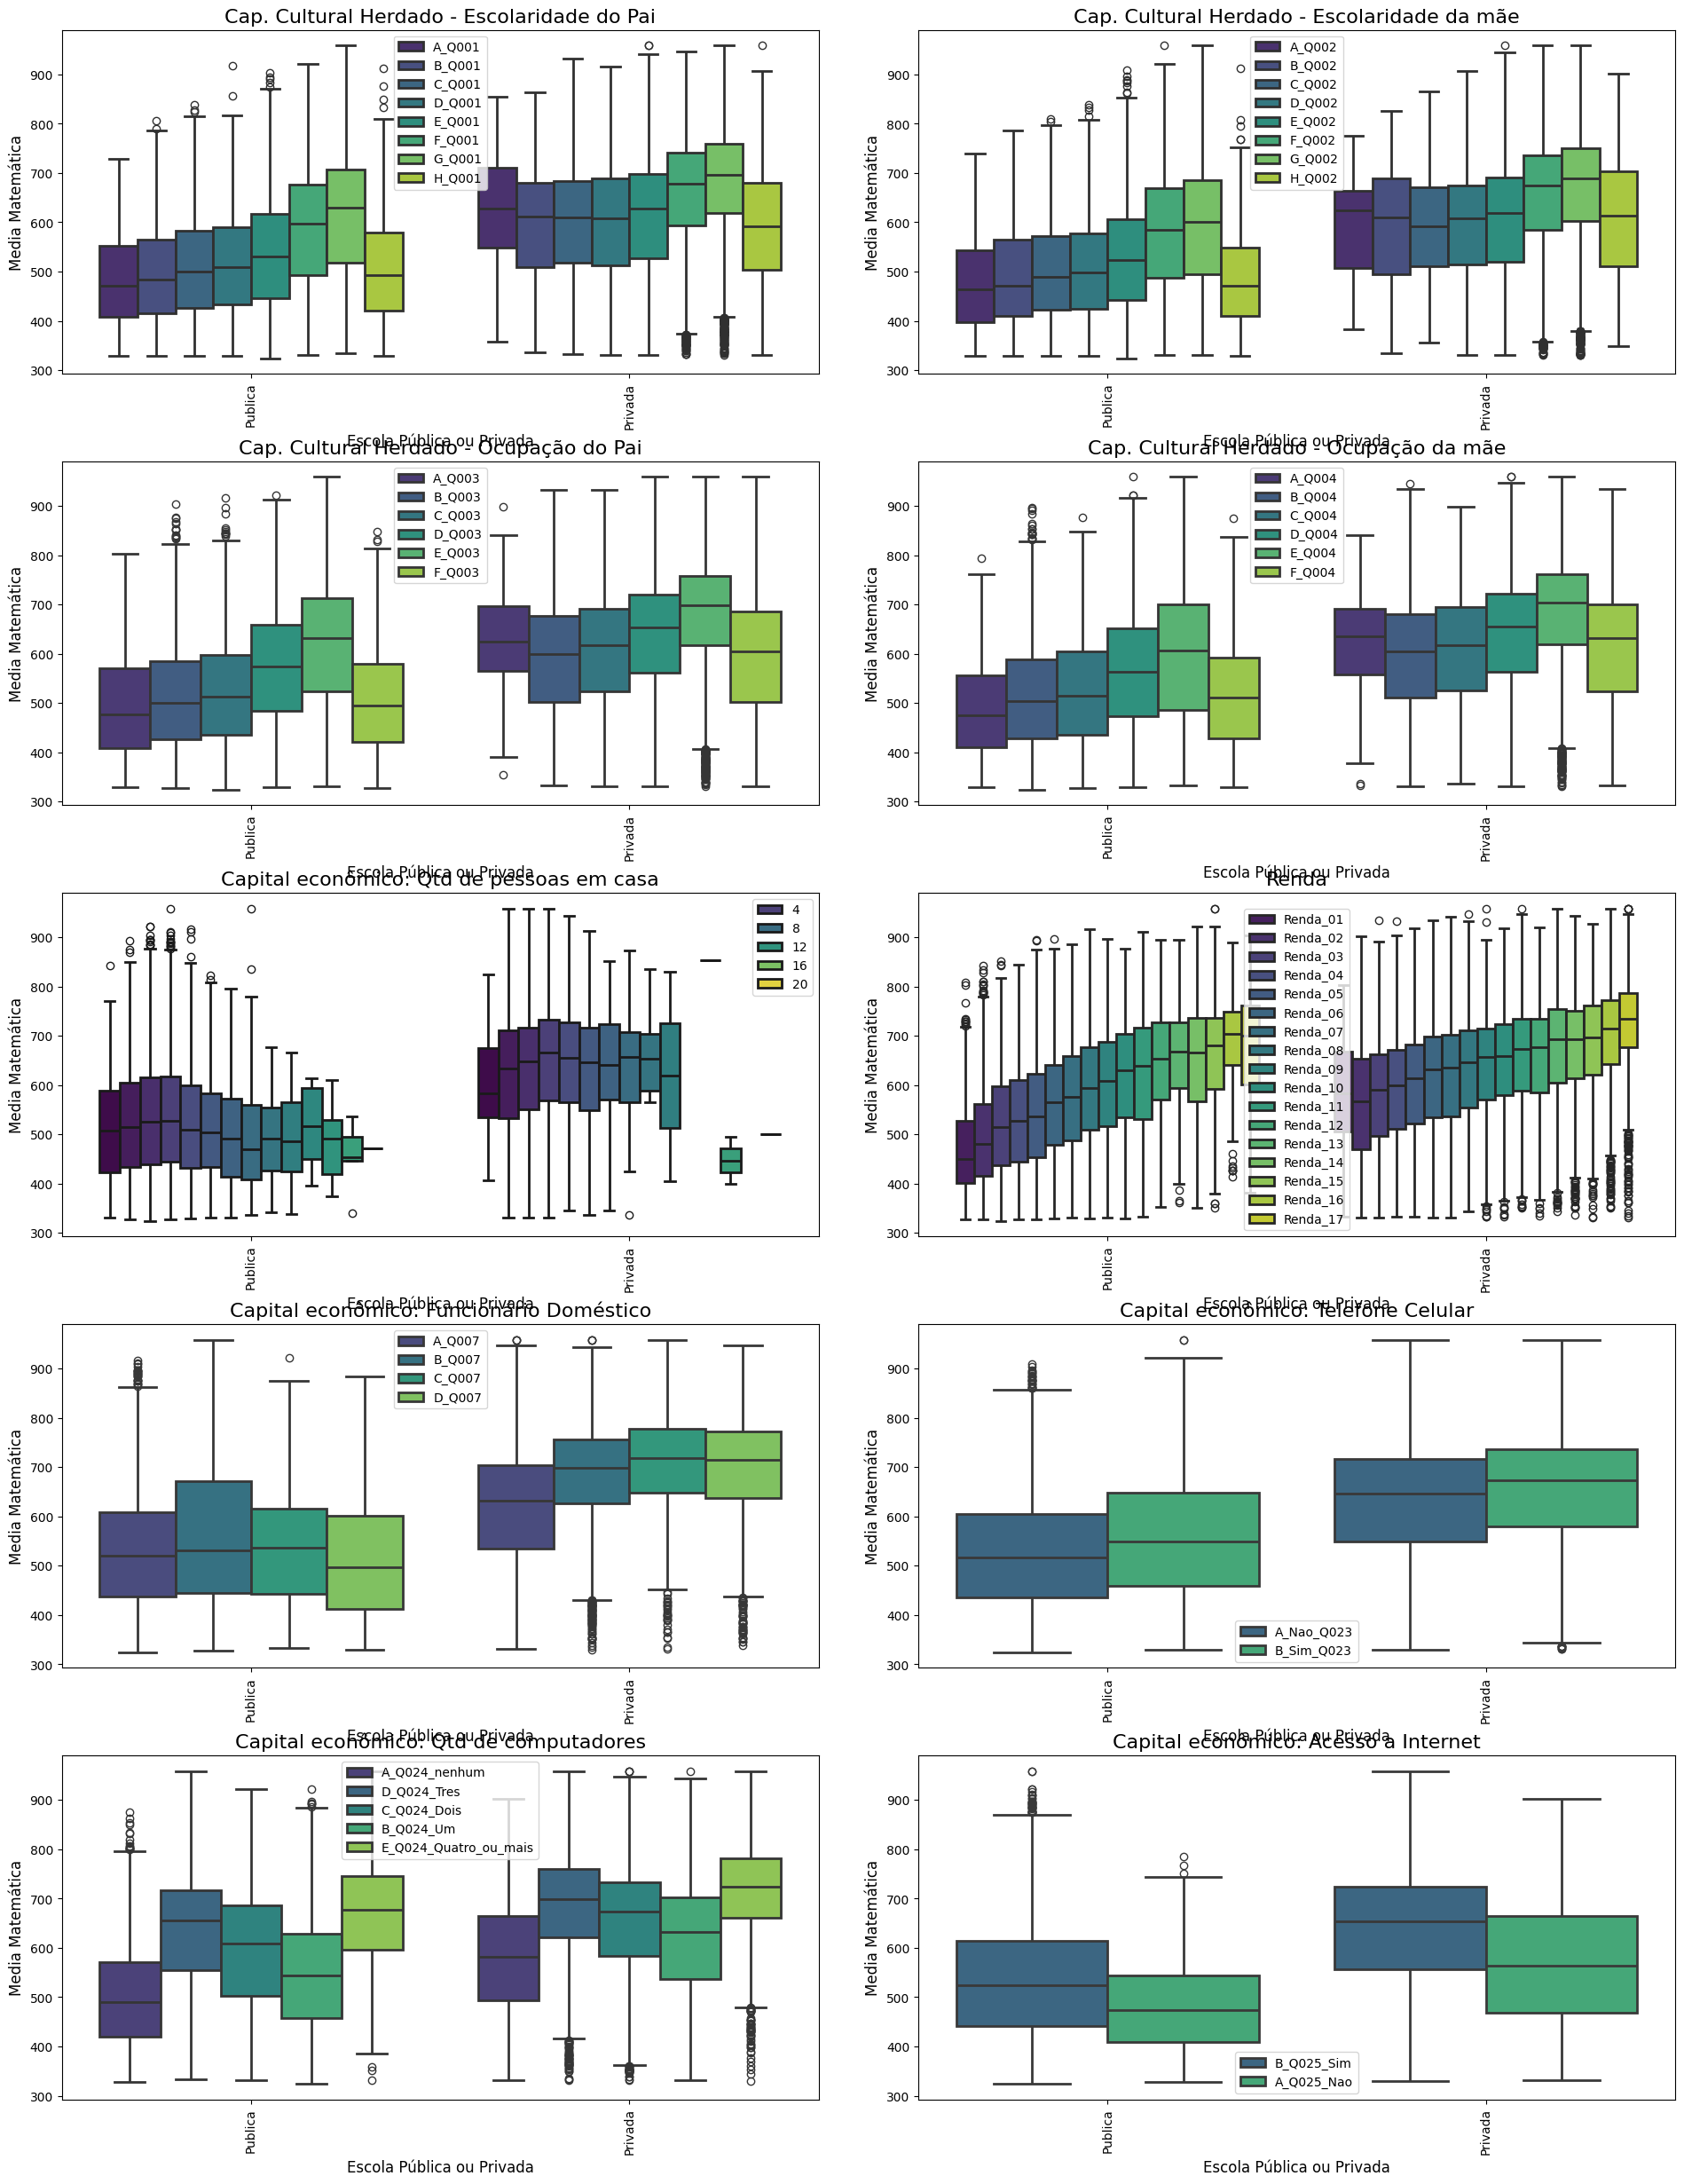

In [28]:
## Box plots para tipo escolar: Matemática - Capital Metropolitana

# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='TP_ESCOLA', y='NU_NOTA_MT', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Escola Pública ou Privada', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02_Meso.groupby('TP_ESCOLA')['NU_NOTA_MT'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 01: Qtd de DVDs (Q001)
sorted_df_01 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q001'])
plot_boxplot(axs[0, 0], sorted_df_01, ordem_categorias, 'Q001', 'Cap. Cultural Herdado - Escolaridade do Pai')

# Gráfico 02: Qtd de TV por assinatura (Q002)
sorted_df_02 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q002'])
plot_boxplot(axs[0, 1], sorted_df_02, ordem_categorias, 'Q002', 'Cap. Cultural Herdado - Escolaridade da mãe')

# Gráfico 03: Qtd de telefone celular (Q003)
sorted_df_03 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q003'])
plot_boxplot(axs[1, 0], sorted_df_03, ordem_categorias, 'Q003', 'Cap. Cultural Herdado - Ocupação do Pai')

# Gráfico 04: Qtd de telefone fixo (Q004)
sorted_df_04 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q004'])
plot_boxplot(axs[1, 1], sorted_df_04, ordem_categorias, 'Q004', 'Cap. Cultural Herdado - Ocupação da mãe')

# Gráfico 05: Qtd de computadores (Q005)
sorted_df_05 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q005'])
plot_boxplot(axs[2, 0], sorted_df_05, ordem_categorias, 'Q005', 'Capital econômico: Qtd de pessoas em casa')

# Gráfico 06: Qtd de computadores (Q006)
sorted_df_06 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q006'])
plot_boxplot(axs[2, 1], sorted_df_06, ordem_categorias, 'Q006', 'Renda')

# Gráfico 07: Qtd de computadores (Q007)
sorted_df_07 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q007'])
plot_boxplot(axs[3, 0], sorted_df_07, ordem_categorias, 'Q007', 'Capital econômico: Funcionário Doméstico')

# Gráfico 08: Qtd de computadores (Q023)
sorted_df_08 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q023'])
plot_boxplot(axs[3, 1], sorted_df_07, ordem_categorias, 'Q023', 'Capital econômico: Telefone Celular')

# Gráfico 09: Qtd de computadores (Q024)
sorted_df_09 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q024'])
plot_boxplot(axs[4, 0], sorted_df_08, ordem_categorias, 'Q024', 'Capital econômico: Qtd de computadores')

# Gráfico 10: Qtd de computadores (Q025)
sorted_df_10 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q025'])
plot_boxplot(axs[4, 1], sorted_df_09, ordem_categorias, 'Q025', 'Capital econômico: Acesso a Internet')

## REDAÇÃO

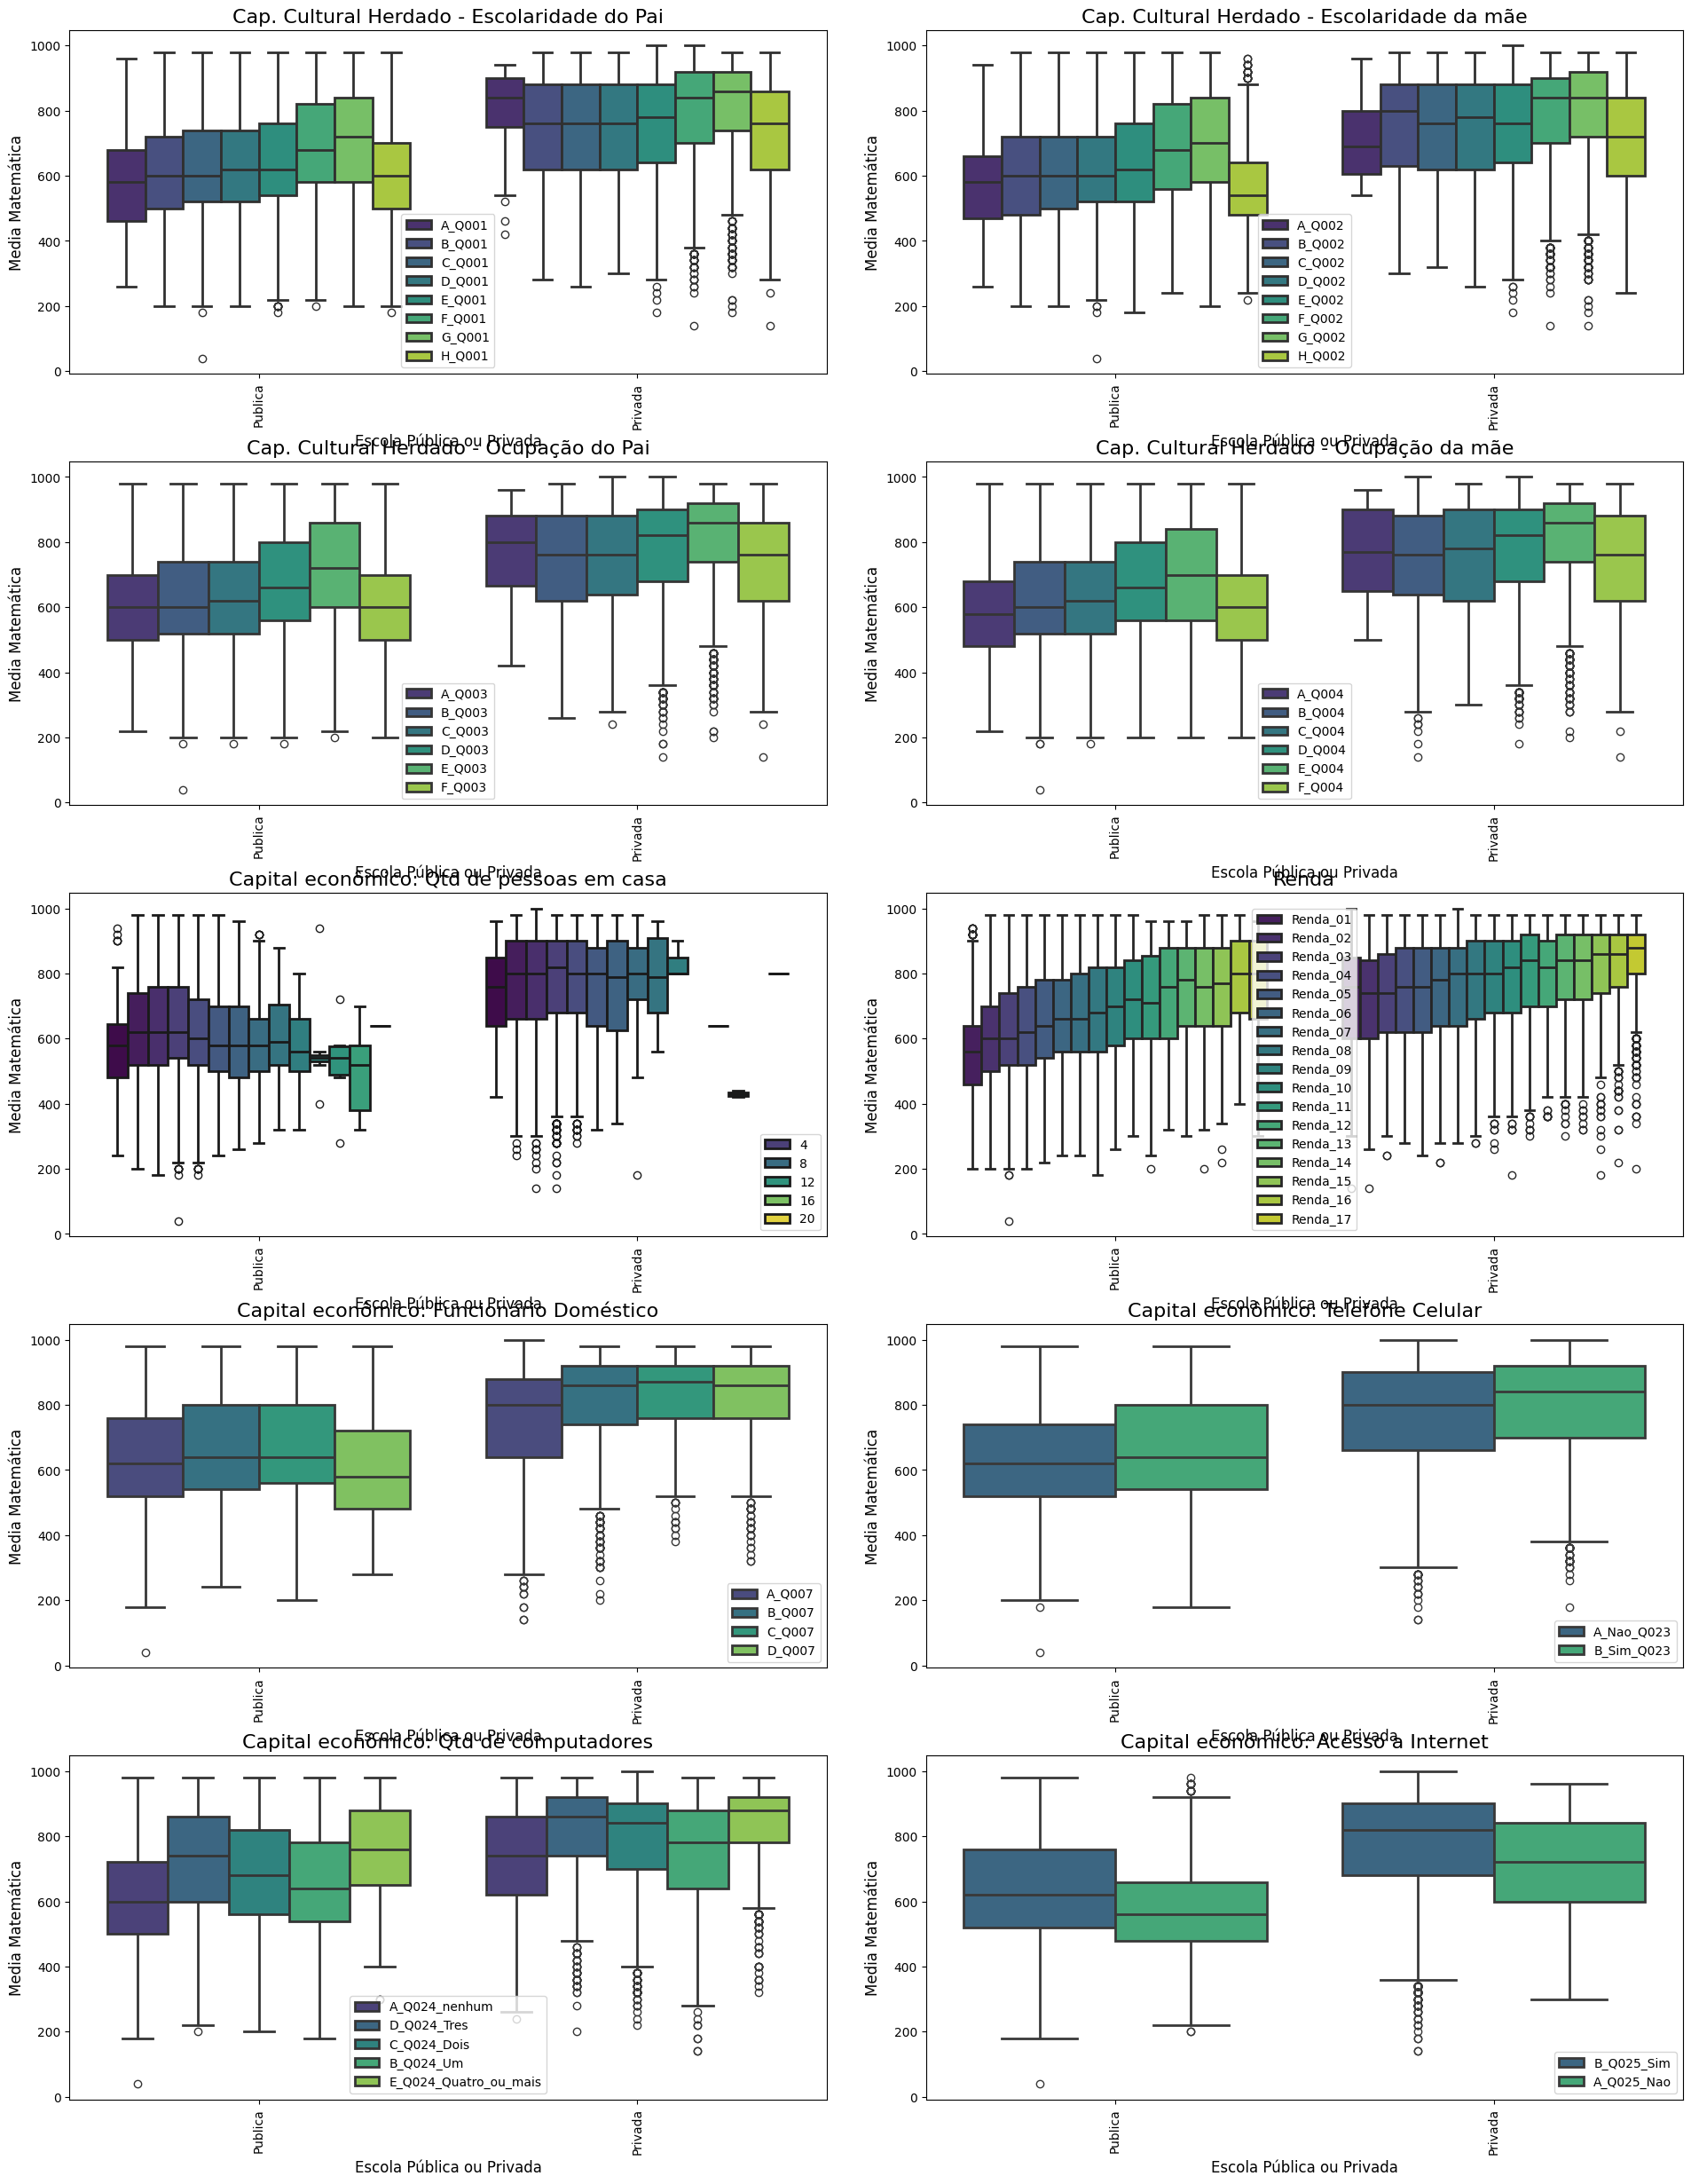

In [24]:
## Box plots para tipo escolar: Matemática - Capital Metropolitana

# Função para criar os gráficos de boxplot
def plot_boxplot(ax, sorted_df, ordem_categorias, hue_col, title):
    sns.boxplot(data=sorted_df, x='TP_ESCOLA', y='NU_NOTA_REDACAO', 
                linewidth=2, orient='v', palette='viridis', 
                order=ordem_categorias, hue=hue_col, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Media Matemática', fontsize=12)
    ax.set_xlabel('Escola Pública ou Privada', fontsize=12)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)

# Subplots layout
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Obtendo medianas e ordem das categorias
medianas = Educacao_enem_bin_mt_muni_02_Meso.groupby('TP_ESCOLA')['NU_NOTA_REDACAO'].median().sort_values()
ordem_categorias = medianas.index

# Gráfico 01: Qtd de DVDs (Q001)
sorted_df_01 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q001'])
plot_boxplot(axs[0, 0], sorted_df_01, ordem_categorias, 'Q001', 'Cap. Cultural Herdado - Escolaridade do Pai')

# Gráfico 02: Qtd de TV por assinatura (Q002)
sorted_df_02 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q002'])
plot_boxplot(axs[0, 1], sorted_df_02, ordem_categorias, 'Q002', 'Cap. Cultural Herdado - Escolaridade da mãe')

# Gráfico 03: Qtd de telefone celular (Q003)
sorted_df_03 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q003'])
plot_boxplot(axs[1, 0], sorted_df_03, ordem_categorias, 'Q003', 'Cap. Cultural Herdado - Ocupação do Pai')

# Gráfico 04: Qtd de telefone fixo (Q004)
sorted_df_04 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q004'])
plot_boxplot(axs[1, 1], sorted_df_04, ordem_categorias, 'Q004', 'Cap. Cultural Herdado - Ocupação da mãe')

# Gráfico 05: Qtd de computadores (Q005)
sorted_df_05 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q005'])
plot_boxplot(axs[2, 0], sorted_df_05, ordem_categorias, 'Q005', 'Capital econômico: Qtd de pessoas em casa')

# Gráfico 06: Qtd de computadores (Q006)
sorted_df_06 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q006'])
plot_boxplot(axs[2, 1], sorted_df_06, ordem_categorias, 'Q006', 'Renda')

# Gráfico 07: Qtd de computadores (Q007)
sorted_df_07 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q007'])
plot_boxplot(axs[3, 0], sorted_df_07, ordem_categorias, 'Q007', 'Capital econômico: Funcionário Doméstico')

# Gráfico 08: Qtd de computadores (Q023)
sorted_df_08 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q023'])
plot_boxplot(axs[3, 1], sorted_df_07, ordem_categorias, 'Q023', 'Capital econômico: Telefone Celular')

# Gráfico 09: Qtd de computadores (Q024)
sorted_df_09 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q024'])
plot_boxplot(axs[4, 0], sorted_df_08, ordem_categorias, 'Q024', 'Capital econômico: Qtd de computadores')

# Gráfico 10: Qtd de computadores (Q025)
sorted_df_10 = Educacao_enem_bin_mt_muni_02_Meso.sort_values(by=['TP_ESCOLA', 'Q025'])
plot_boxplot(axs[4, 1], sorted_df_09, ordem_categorias, 'Q025', 'Capital econômico: Acesso a Internet')

## Caracteristicas Individuais candidatos: panorama geral

## MATEMÁTICA

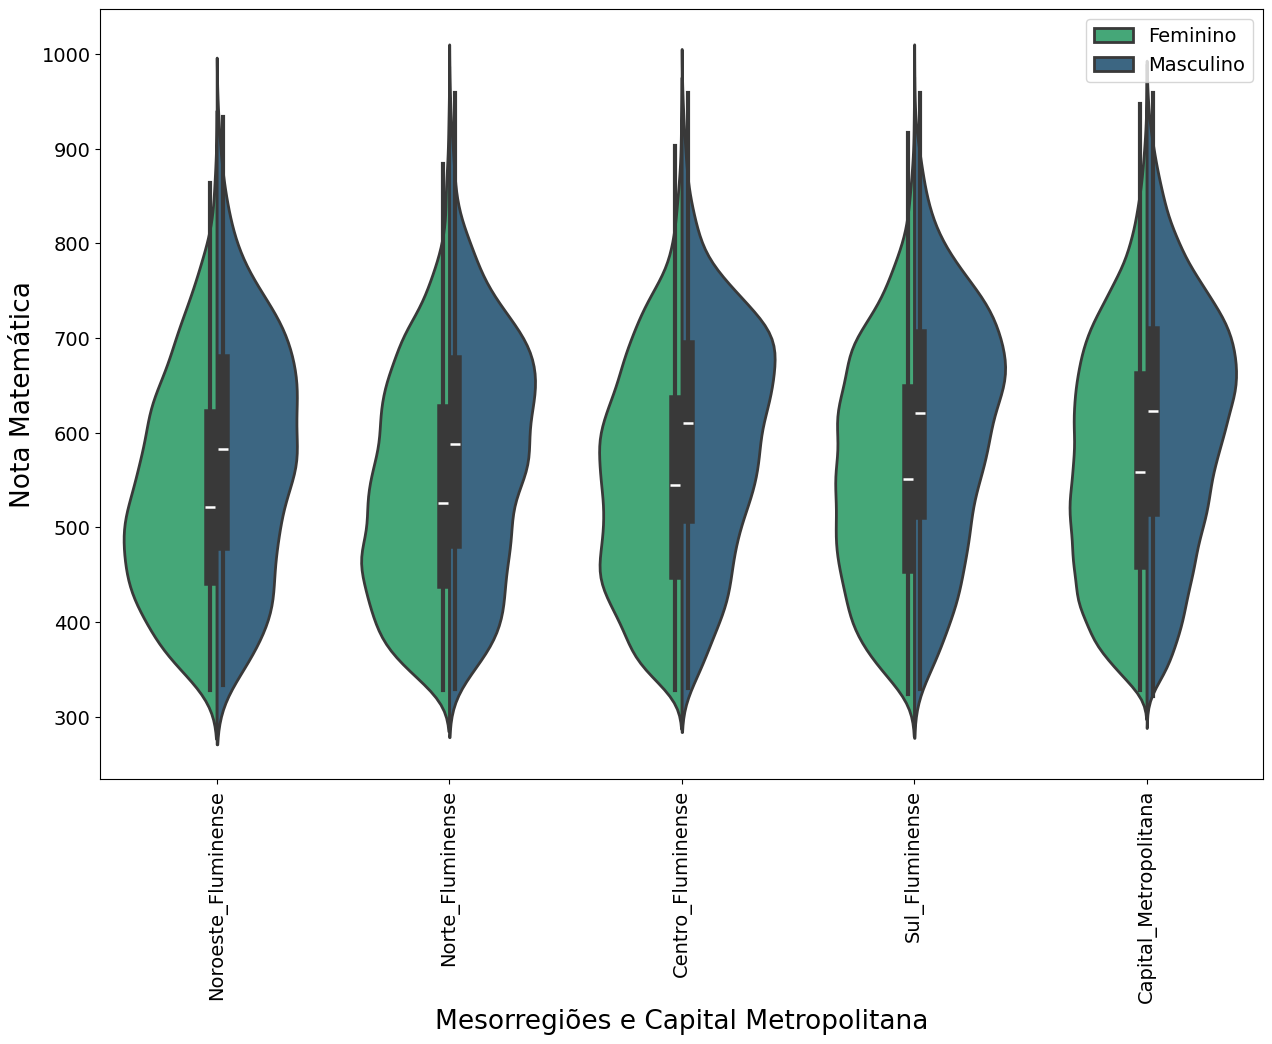

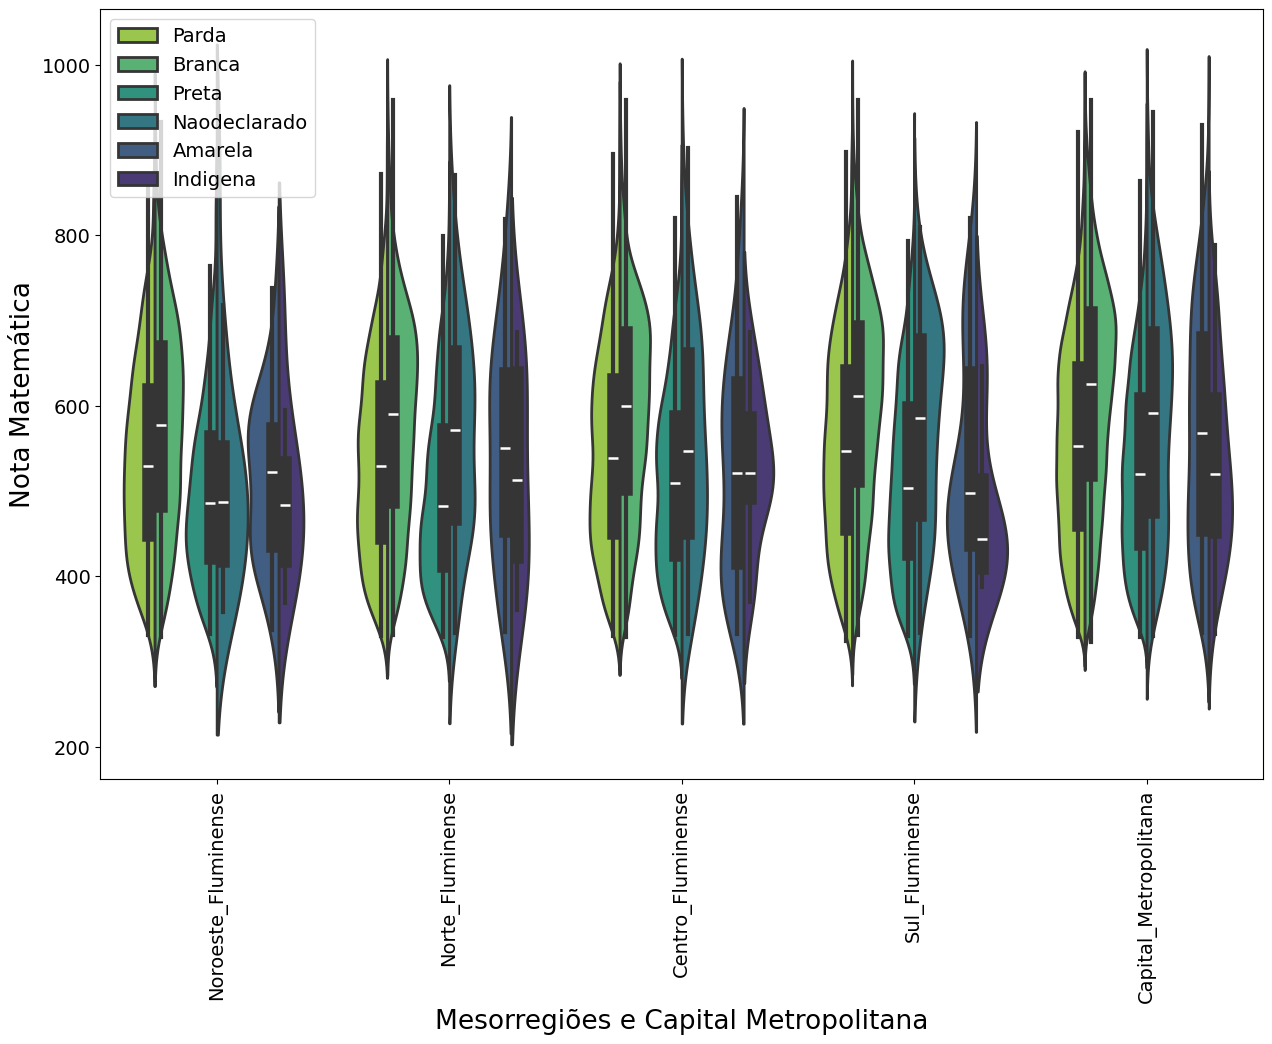

In [25]:
# Ordenando a DataFrame com base na mediana da nota de matemática por mesorregião
medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_MT'].median().sort_values()
ordem_categorias = medianas.index

# Ordena o DataFrame baseado em 'Meso_Regiao' e 'Genero'
sorted_df = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'TP_SEXO'])

# Criar o gráfico de violino
plt.figure(figsize=(15, 10))
sns.violinplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_MT', 
               linewidth=2, palette='viridis_r', order=ordem_categorias, hue='TP_SEXO', split=True)
#YlOrBr
# Adicionar uma linha horizontal
#plt.axhline(y=0.00, color='r', linestyle='--', linewidth=2, label='Linha de Referência')

# Customizar o gráfico
plt.ylabel('Nota Matemática', fontsize=19)
plt.xlabel('Mesorregiões e Capital Metropolitana', fontsize=19)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

# Opcionalmente adicionar uma legenda
plt.legend(fontsize=14)

medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_MT'].median().sort_values()
ordem_categorias = medianas.index

# Ordena o DataFrame baseado em 'Meso_Regiao' e 'Genero'
sorted_df = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'TP_SEXO'])

# Criar o gráfico de violino
plt.figure(figsize=(15, 10))
sns.violinplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_MT', 
               linewidth=2, palette='viridis_r', order=ordem_categorias, hue='TP_COR_RACA', split=True)
#YlOrBr
# Adicionar uma linha horizontal
#plt.axhline(y=0.00, color='r', linestyle='--', linewidth=2, label='Linha de Referência')

# Customizar o gráfico
plt.ylabel('Nota Matemática', fontsize=19)
plt.xlabel('Mesorregiões e Capital Metropolitana', fontsize=19)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

# Opcionalmente adicionar uma legenda
plt.legend(fontsize=14)

## REDAÇÃO

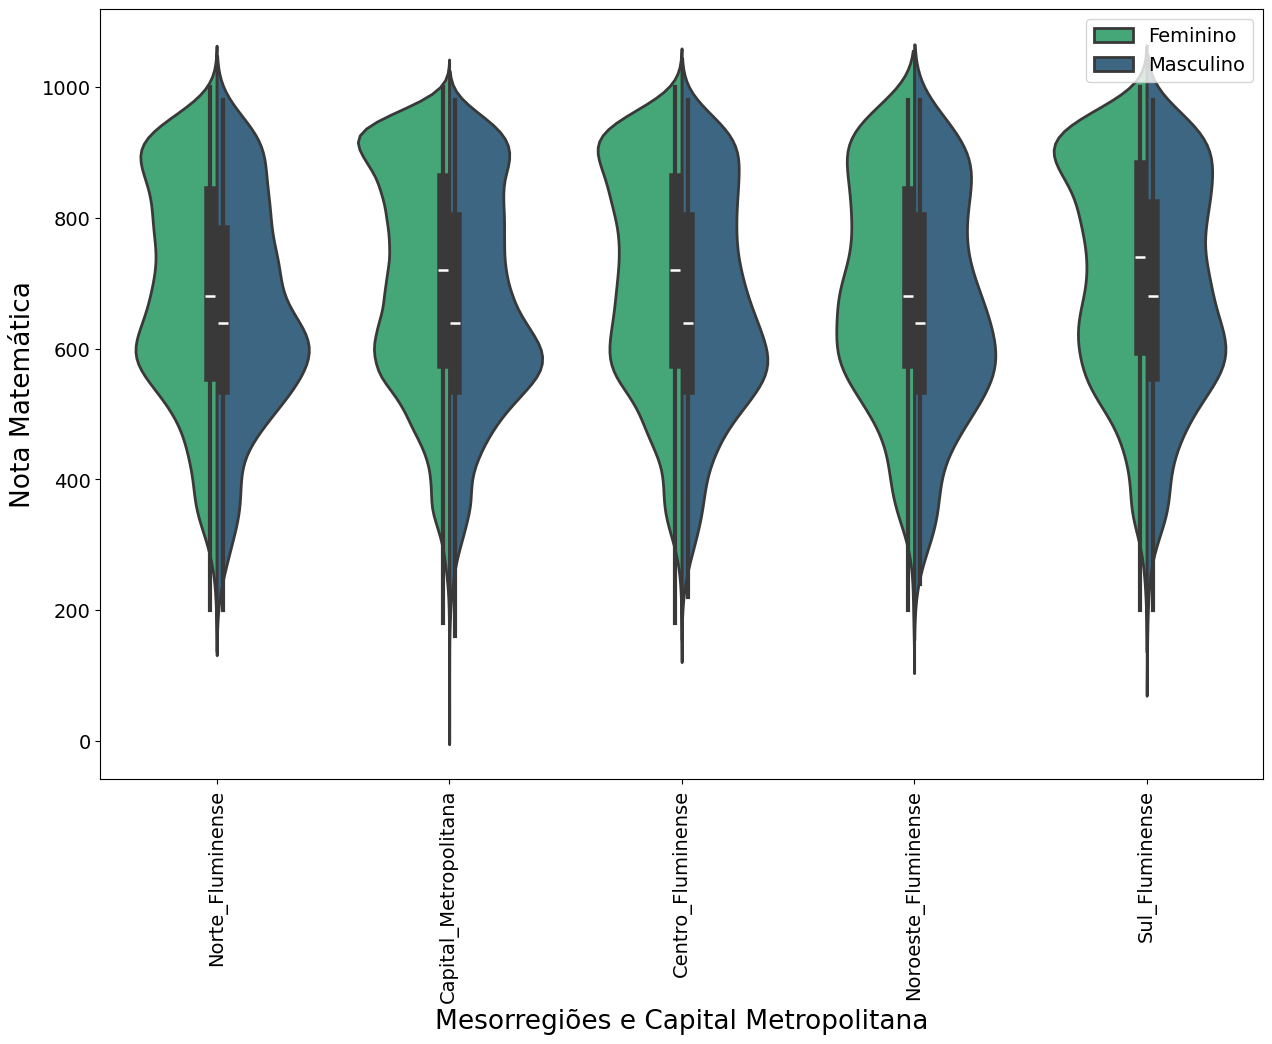

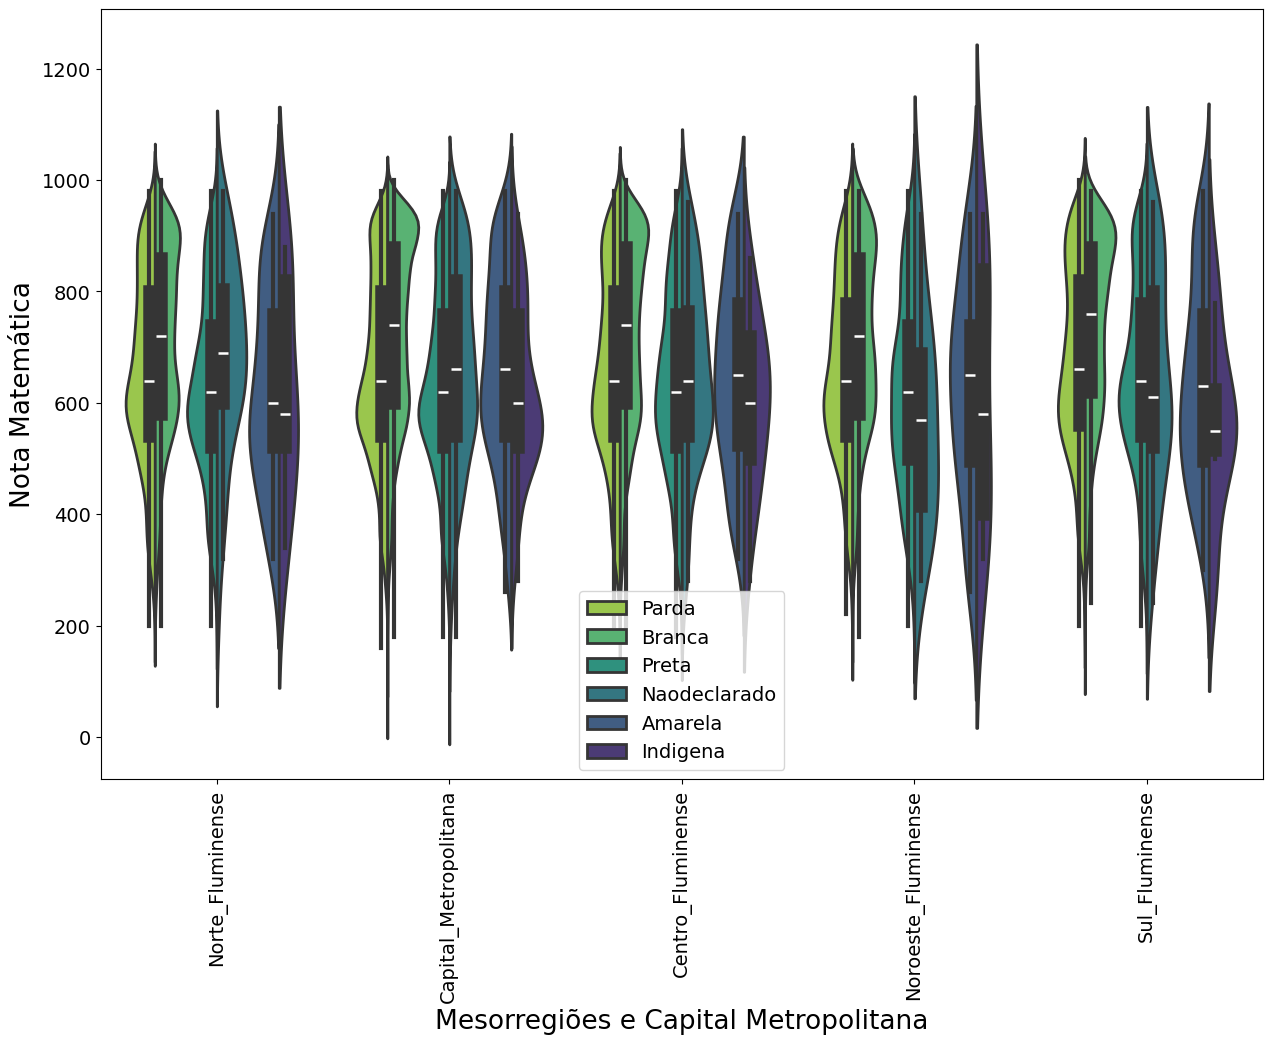

In [26]:
# Ordenando a DataFrame com base na mediana da nota de matemática por mesorregião
medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_REDACAO'].median().sort_values()
ordem_categorias = medianas.index

# Ordena o DataFrame baseado em 'Meso_Regiao' e 'Genero'
sorted_df = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'TP_SEXO'])

# Criar o gráfico de violino
plt.figure(figsize=(15, 10))
sns.violinplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_REDACAO', 
               linewidth=2, palette='viridis_r', order=ordem_categorias, hue='TP_SEXO', split=True)
#YlOrBr
# Adicionar uma linha horizontal
#plt.axhline(y=0.00, color='r', linestyle='--', linewidth=2, label='Linha de Referência')

# Customizar o gráfico
plt.ylabel('Nota Matemática', fontsize=19)
plt.xlabel('Mesorregiões e Capital Metropolitana', fontsize=19)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

# Opcionalmente adicionar uma legenda
plt.legend(fontsize=14)

medianas = Educacao_enem_bin_mt_muni_02.groupby('Meso_Regiao')['NU_NOTA_REDACAO'].median().sort_values()
ordem_categorias = medianas.index

# Ordena o DataFrame baseado em 'Meso_Regiao' e 'Genero'
sorted_df = Educacao_enem_bin_mt_muni_02.sort_values(by=['Meso_Regiao', 'TP_SEXO'])

# Criar o gráfico de violino
plt.figure(figsize=(15, 10))
sns.violinplot(data=sorted_df, x='Meso_Regiao', y='NU_NOTA_REDACAO', 
               linewidth=2, palette='viridis_r', order=ordem_categorias, hue='TP_COR_RACA', split=True)
#YlOrBr
# Adicionar uma linha horizontal
#plt.axhline(y=0.00, color='r', linestyle='--', linewidth=2, label='Linha de Referência')

# Customizar o gráfico
plt.ylabel('Nota Matemática', fontsize=19)
plt.xlabel('Mesorregiões e Capital Metropolitana', fontsize=19)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

# Opcionalmente adicionar uma legenda
plt.legend(fontsize=14)

## índice HII para concentração de notas e desempenho por região

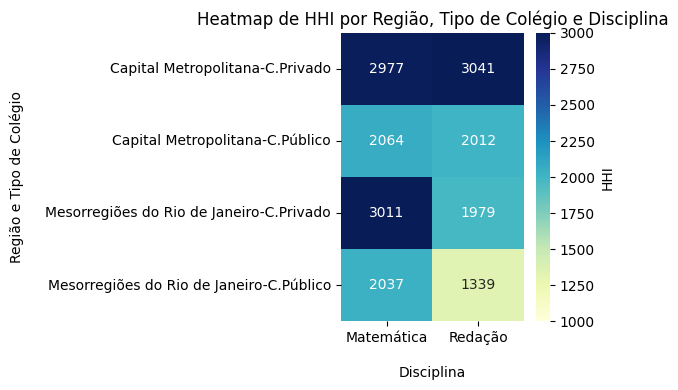

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Desativar a notação científica no Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Criação do DataFrame com os dados fornecidos
data = {
    'Região': ['Capital Metropolitana', 'Capital Metropolitana', 'Capital Metropolitana', 'Capital Metropolitana', 
               'Mesorregiões do Rio de Janeiro', 'Mesorregiões do Rio de Janeiro', 'Mesorregiões do Rio de Janeiro', 'Mesorregiões do Rio de Janeiro'],
    'Variável de interesse': ['Colégio Público', 'Colégio Privado', 'Colégio Público', 'Colégio Privado', 
                              'Colégio Público', 'Colégio Privado', 'Colégio Público', 'Colégio Privado'],
    'Disciplina': ['Matemática', 'Matemática', 'Redação', 'Redação', 
                   'Matemática', 'Matemática', 'Redação', 'Redação'],
    'HHI': [2064, 2977, 2012, 3041, 2037, 3011, 1339, 1979]
}

df = pd.DataFrame(data)

# Abreviação dos nomes dos colégios
df['Variável de interesse'] = df['Variável de interesse'].replace({
    'Colégio Público': 'C.Público',
    'Colégio Privado': 'C.Privado'
})

# Pivotando o DataFrame para usar no heatmap
heatmap_data = df.pivot_table(index=['Região', 'Variável de interesse'], columns='Disciplina', values='HHI')

# Criando o heatmap com Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', vmin=1000, vmax=3000, cbar_kws={'label': 'HHI'})

# Adicionando títulos e labels
plt.title('Heatmap de HHI por Região, Tipo de Colégio e Disciplina')
plt.xlabel('Disciplina', labelpad=15)
plt.ylabel('Região e Tipo de Colégio', labelpad=15)

plt.tight_layout()
# Salvando o heatmap como um arquivo JPEG
plt.savefig('heatmap_HHI.jpeg', format='jpeg', dpi=1500, bbox_inches='tight')

# Mostrando o gráfico
plt.show()

## Concentração de desempenho maior entre os alunos de colégio privado em comparação ao colégio público